In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
%matplotlib inline     
sns.set(color_codes=True)


## Import data

In [159]:
!pwd
df = pd.read_csv('../data/data.csv', na_values=["?", "undefined"])

df.head()

/home/elmer/dev_debian/working/python3/MIWProject1/build/notebooks


genetic  length   mass  exercise  smoking  alcohol  sugar  lifespan
0     73.9   185.0   99.7       0.9      0.0      2.4    6.9      73.1
1     86.0   172.0  105.4       1.8      8.1      0.4    4.2      85.0
2     83.3   176.0  111.4       1.1      0.8      4.6    7.5      81.6
3     82.8   164.0  111.4       4.7     11.8      1.0    2.9      81.0
4     78.7   178.0   71.6       1.5      8.3      4.9    5.5      75.0

## Describe data

#### Summary
* Data counts 4095 entries
* Data has no duplicates
* Data has 10 rows with missing data
* With so little missing data, it is safe to remove the rows with missing data
* lifespan has 2 negative values in the data which are outliers that I have removed

In [160]:
# get info on missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4095 non-null   float64
 1   length    4093 non-null   float64
 2   mass      4094 non-null   float64
 3   exercise  4095 non-null   float64
 4   smoking   4096 non-null   float64
 5   alcohol   4094 non-null   float64
 6   sugar     4095 non-null   float64
 7   lifespan  4096 non-null   float64
dtypes: float64(8)
memory usage: 256.1 KB


In [161]:
# describe dataset
df.describe()

genetic       length         mass     exercise      smoking  \
count  4095.000000  4093.000000  4094.000000  4095.000000  4096.000000   
mean     82.268352   183.880283    92.268442     2.402125     9.807446   
std       7.442579    12.623054    25.791314     1.170062     6.921461   
min      63.900000   154.000000    50.000000     0.100000     0.000000   
25%      77.600000   175.000000    71.500000     1.500000     3.300000   
50%      81.800000   184.000000    89.500000     2.200000     9.500000   
75%      86.700000   193.000000   110.875000     3.200000    15.900000   
max     102.200000   214.000000   163.600000     5.500000    22.200000   

           alcohol        sugar     lifespan  
count  4094.000000  4095.000000  4096.000000  
mean      2.264558     6.482955    80.127783  
std       1.800523     2.710213     8.042270  
min       0.000000     0.700000    -1.000000  
25%       0.600000     4.400000    75.000000  
50%       1.700000     6.300000    79.700000  
75%       4.000000     8.400000    85.200000  
max       6.000000    13.800000   105.100000

In [162]:
# I found negative lifespan values in the dataset, how many do we have
display(df[df['lifespan'] < 10])
# Only two, so I will remove it from the df
df = df[(df['lifespan'] > 10)]
df[df['lifespan'] < 10]
df.describe()

genetic  length   mass  exercise  smoking  alcohol  sugar  lifespan
889      88.1   156.0  112.9       0.7     19.5      0.9    3.0      -1.0
2300     82.6   188.0   63.1       3.6     15.0      0.2    1.0      -1.0

genetic       length         mass     exercise      smoking  \
count  4093.000000  4091.000000  4092.000000  4093.000000  4094.000000   
mean     82.266846   183.886091    92.270528     2.402248     9.803810   
std       7.443837    12.618445    25.791570     1.169896     6.921018   
min      63.900000   154.000000    50.000000     0.100000     0.000000   
25%      77.600000   175.000000    71.500000     1.500000     3.300000   
50%      81.800000   184.000000    89.500000     2.200000     9.500000   
75%      86.700000   193.000000   110.825000     3.200000    15.900000   
max     102.200000   214.000000   163.600000     5.500000    22.200000   

           alcohol        sugar     lifespan  
count  4092.000000  4093.000000  4094.000000  
mean      2.265396     6.485145    80.167416  
std       1.800547     2.708972     7.841687  
min       0.000000     0.700000    57.000000  
25%       0.600000     4.400000    75.000000  
50%       1.700000     6.300000    79.700000  
75%       4.000000     8.400000    85.200000  
max       6.000000    13.800000   105.100000

In [163]:
# do we have duplicate rows in the dataframe
df[df.duplicated()].shape

(0, 8)

In [164]:
# do we have missing values
df.isna().sum()

genetic     1
length      3
mass        2
exercise    1
smoking     0
alcohol     2
sugar       1
lifespan    0
dtype: int64

In [165]:
# which rows have missing values
df[df.isnull().any(axis=1)]

genetic  length   mass  exercise  smoking  alcohol  sugar  lifespan
947      82.0   193.0   68.0       1.3     17.2      NaN    1.2      75.3
1038     81.5     NaN  100.2       2.5      8.9      1.3    7.9      81.2
1861     76.7     NaN  115.9       1.1      4.8      3.1    2.9      74.4
2354     74.8   183.0  123.2       2.3     13.8      NaN    8.1      70.4
2576     76.4   174.0   90.9       NaN     21.7      0.4    3.7      71.0
2721     88.9   179.0    NaN       3.1      0.2      0.5    5.1      91.5
2793     78.0   178.0   71.9       1.3      0.1      4.1    NaN      77.4
3043     66.7     NaN   74.0       2.4      0.1      2.0   10.5      67.6
3398      NaN   204.0   72.0       1.0      9.9      0.4    5.4      83.0
4027     67.3   180.0    NaN       1.6      0.0      0.4    5.3      67.9

In [166]:
# Percentage wise we have so little missing data that it is safe to drop them from the dataframe
df = df.dropna()
df.head()

genetic  length   mass  exercise  smoking  alcohol  sugar  lifespan
0     73.9   185.0   99.7       0.9      0.0      2.4    6.9      73.1
1     86.0   172.0  105.4       1.8      8.1      0.4    4.2      85.0
2     83.3   176.0  111.4       1.1      0.8      4.6    7.5      81.6
3     82.8   164.0  111.4       4.7     11.8      1.0    2.9      81.0
4     78.7   178.0   71.6       1.5      8.3      4.9    5.5      75.0

## Outliers

#### Summary
The Seaborn boxplots - which plot the whiskers at 1.5 maximum distance from the interquartile range (IQR) by default - do highlight some outliers in genetic and lifespan.<br>
Since the goal is to build a model that can accurately predict the lifespan of patients visiting the doctor, removing these outliers would only make sense with a good reason to do so. Looking at the histograms, I do not see anything disturbing yet.

From: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/assumptions-of-regression-analysis.html#:~:text=Regression%20Assumptions&text=The%20chosen%20sample%20is%20representative,a%20histogram%20of%20the%20residuals.

For the simple and multiple regression model to hold there are some assumptions we need to make:

* The chosen sample is representative of the population. --> **Assumed**
* There is a linear relationship between the independent variable(s) and the dependent variable. --> **To check with pairplots and correlation plots**
* All the variables are normally distributed; to check, plot a histogram of the residuals. --> **Fit inputs one by one to lifespan with Ordinary Least Squares and plot histogram of the residuals**
* There are no outliers, (if there are outliers they need to be removed); to check use a test for detecting outliers. --> **Already checked with boxplots**
* The independent variables are all linearly independent (no variable dependents of the other variables); to check plot the independent values against each other and look for a correlation. --> **To check with pairplots and correlation plots**
* For multiple regression there should be at least five times as many pairs of data than dependent variables. --> **Confirmed**



<AxesSubplot: xlabel='lifespan'>

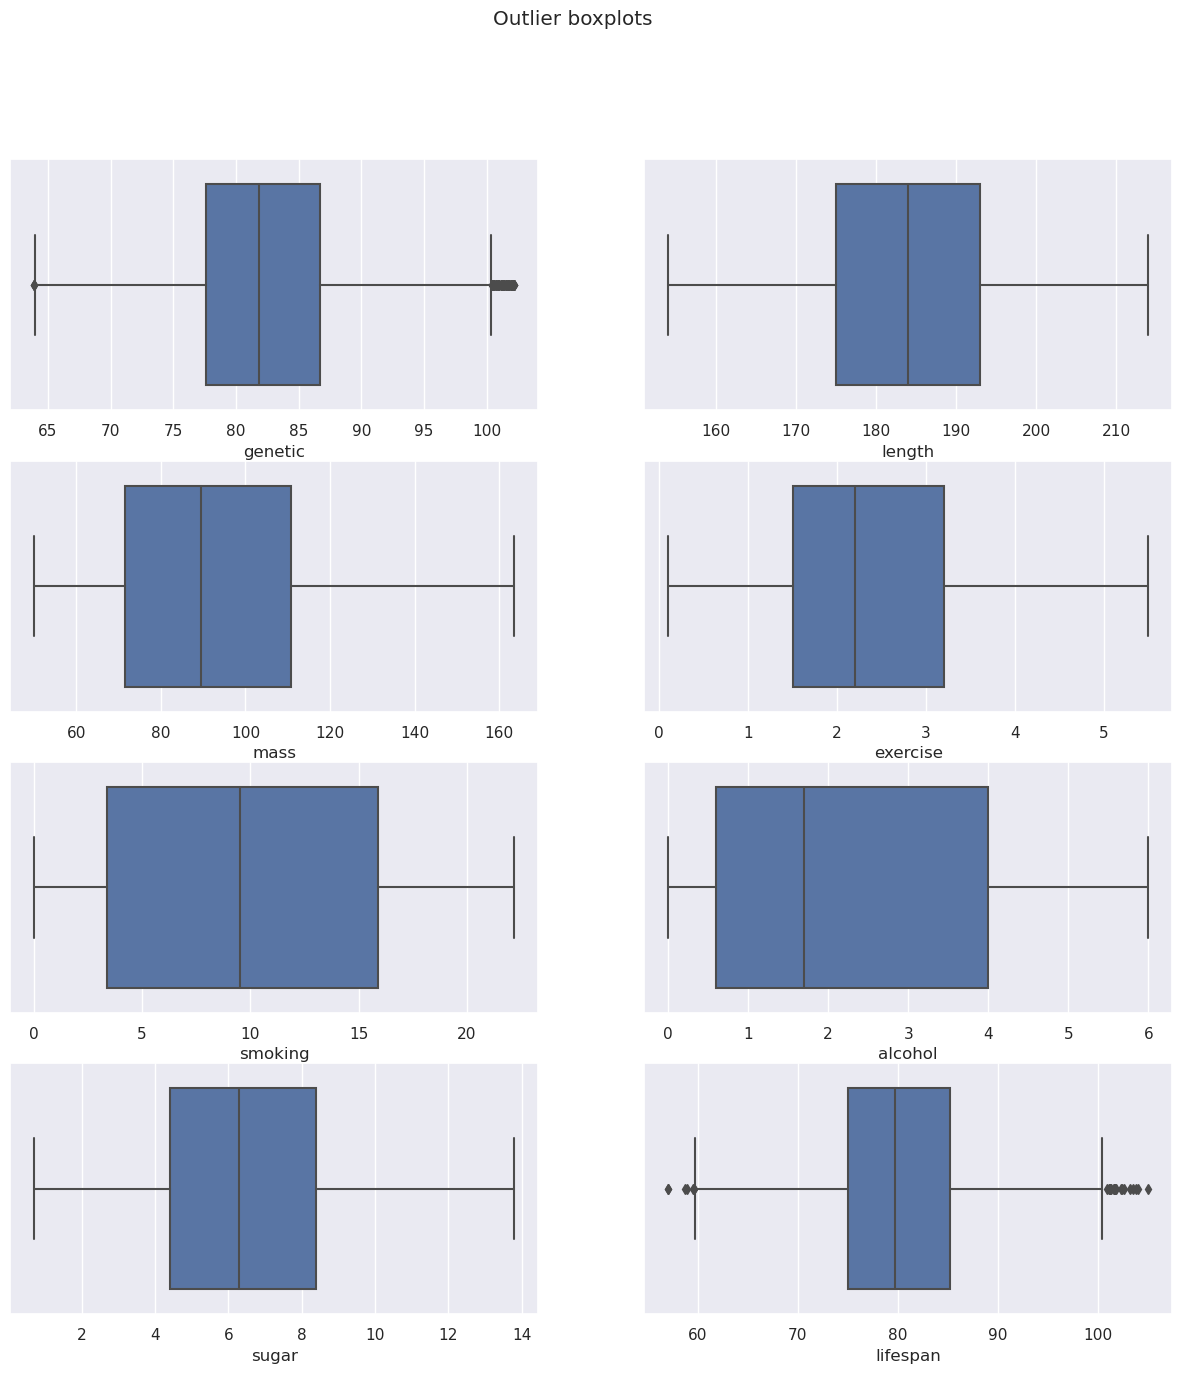

In [167]:
# Looking for outliers
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Outlier boxplots')
sns.boxplot(ax=axes[0, 0], x=df['genetic'])
sns.boxplot(ax=axes[0, 1], x=df['length'])
sns.boxplot(ax=axes[1, 0], x=df['mass'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'])

# TODO: are these really outliers? Currently I don't see reason to remove them from the dataset. They might be of interest with the application in mind.

<AxesSubplot: xlabel='lifespan', ylabel='Count'>

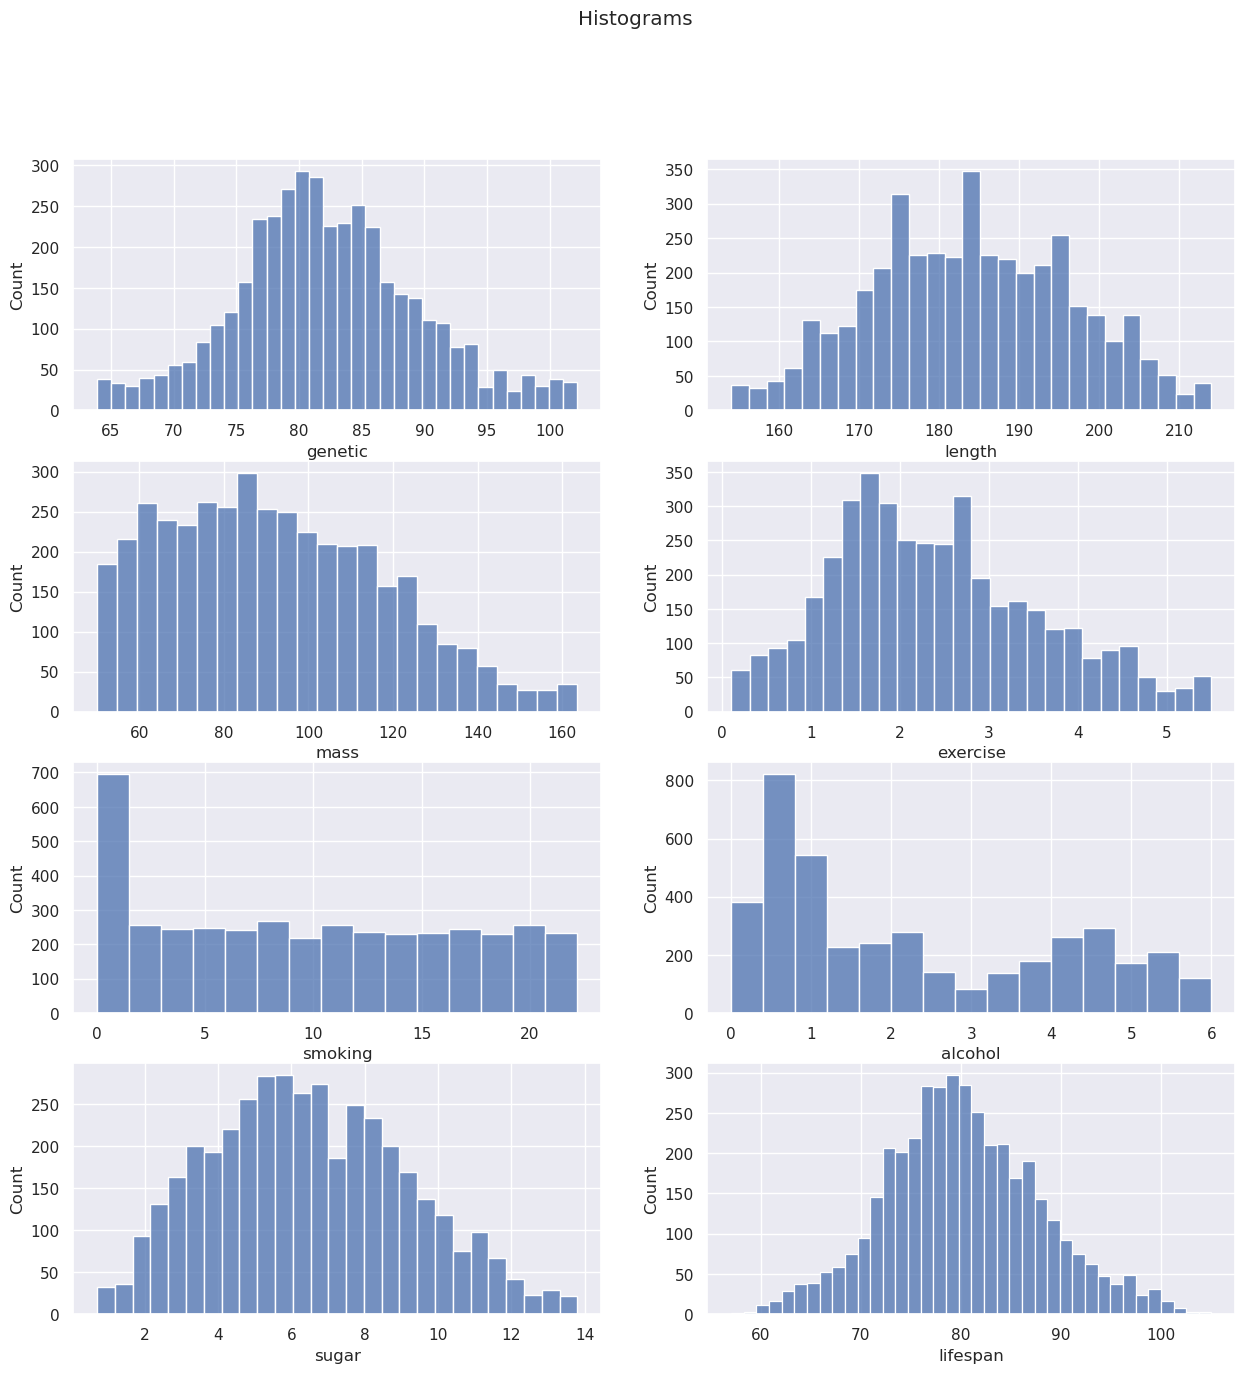

In [168]:
# What is the distribution of values
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Histograms')
sns.histplot(ax=axes[0, 0], x=df['genetic'])
sns.histplot(ax=axes[0, 1], x=df['length'])
sns.histplot(ax=axes[1, 0], x=df['mass'])
sns.histplot(ax=axes[1, 1], x=df['exercise'])
sns.histplot(ax=axes[2, 0], x=df['smoking'])
sns.histplot(ax=axes[2, 1], x=df['alcohol'])
sns.histplot(ax=axes[3, 0], x=df['sugar'])
sns.histplot(ax=axes[3, 1], x=df['lifespan'])

# Also in the histograms I don't see outliers. Some have a longer tail. TODO: Sugar 5 might be an outlier?

## Checking for normality

* Fit inputs one by one to lifespan with Ordinary Least Squares and plot histogram of the residuals
* Plot QQ-plot of the residuals
* Show Shapiro-Wilk test to test the null hypothesis that the data was drawn from a normal distribution.

### **Summary**
Based on the above plots and tests only length is normally distributed. To be able to create an accurate model having normally distributed data is key.
I am going to check if I can transform the data to make it normally distributed. The transformations I am going to try are:<br>

**Normalization**
* Min-Max
* Z score

**Skewness of data:**
* *Positively skewed data* (or right skewed data)
  * Square root
  * Cube root
  * Logarithmic<br>
<br>
* *Negatively skewed data* (or left skewed data)
  * Square
  * Cube root
  * Logarithmic<br>

*Source: https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55*
  



Shapiro-Wilk test for Genetic --> p-value: 2.1752205885041537e-14 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Length --> p-value: 0.43276166915893555 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Mass --> p-value: 8.964663794545595e-22 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Exercise --> p-value: 4.328965725265308e-22 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Smoking --> p-value: 2.5563253405431584e-33 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Alcohol --> p-value: 2.1019476964872256e-43 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Sugar --> p-value: 4.3572316707398556e-14 (p-value > 0.05 means data is normally distributed)


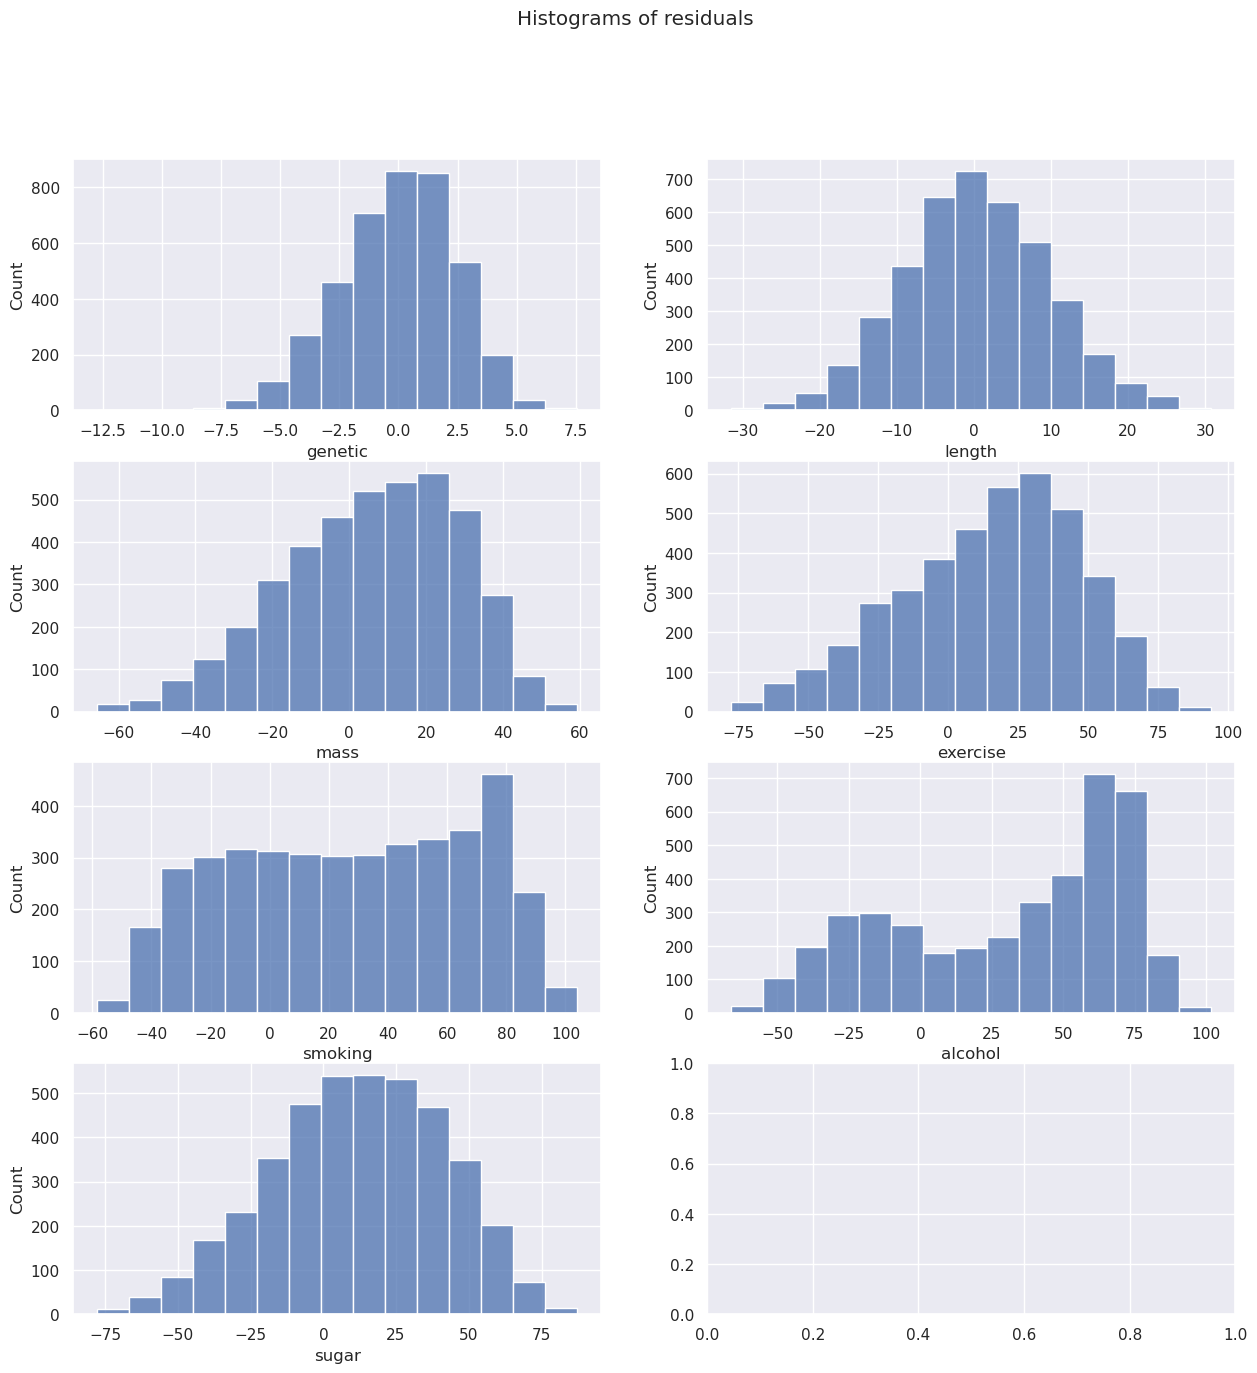

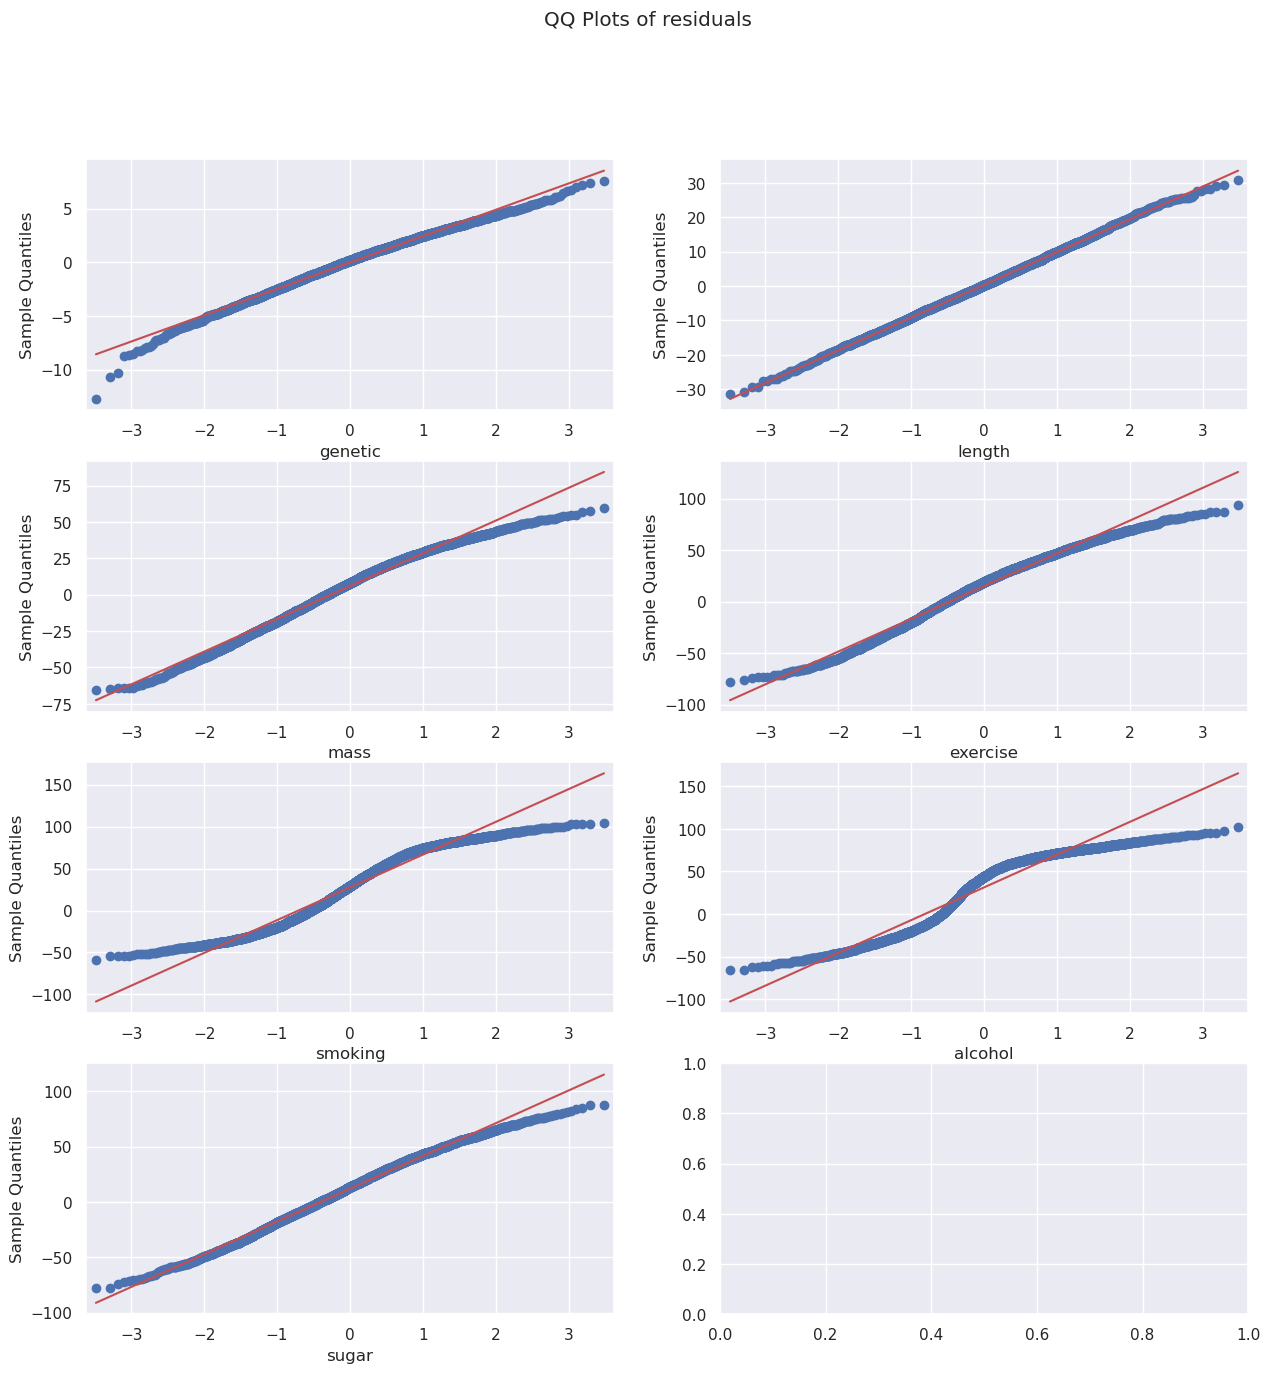

In [169]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Histograms of residuals')

fig2, axes2 = plt.subplots(4, 2, figsize=(15, 15))
fig2.suptitle('QQ Plots of residuals')

k=-1
residuals = []
for i, column in enumerate(df.loc[:, ~df.columns.isin(['lifespan'])].columns):
    l=1
    if i % 2 == 0:
        l=0
        k += 1
        
    model = sm.OLS(df['lifespan'], df[column])
    results = model.fit()
    residuals = df['lifespan'] - results.predict()
    residuals.rename(column, inplace=True)
    sns.histplot(ax=axes[k, l], bins=15, x=residuals)
    sm.qqplot(residuals, ax=axes2[k, l], line='r', xlabel=column)
    print(f"Shapiro-Wilk test for {column.capitalize()} --> p-value: {scipy.stats.shapiro(residuals).pvalue} (p-value > 0.05 means data is normally distributed)")



## Transformations

**Normalization:**
* Min-Max
* Z score

**Skewness of data:**
* *Positively skewed data* (or right skewed data)
  * Square root
  * Cube root
  * Logarithmic<br>
<br>
* *Negatively skewed data* (or left skewed data)
  * Square
  * Cube root
  * Logarithmic

#### *Outcome:*
The above transformations did not yield the required normalized data. So I need something more advanced. Sklearn provides several power transformations like Box-Cox Transformer, Yeo-Johnson Transformer and Quantile Transformer.


In [170]:
# checking skewness of data
# skewness = 3 * (mean - median) / standard devation

for column in df.loc[:, df.columns.isin(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar'])].columns:
    print(f"{column.capitalize()} --> Skewness: {3*(df[column].mean() - df[column].median()) / df[column].std()}")


Genetic --> Skewness: 0.19295894346641118
Length --> Skewness: -0.027292961143370716
Mass --> Skewness: 0.3227697118651209
Exercise --> Skewness: 0.5215459077896826
Smoking --> Skewness: 0.13400166988751022
Alcohol --> Skewness: 0.9441960465797998
Sugar --> Skewness: 0.20730407418912655


In [171]:
df_transformed = df.copy()
for column in df_transformed.loc[:, df_transformed.columns.isin(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar'])].columns:
    df_transformed[f"{column}_sqrt"] = np.power(df_transformed[column], 1/2)
    df_transformed[f"{column}_cuberoot"] = np.power(df_transformed[column], 1/3)
    df_transformed[f"{column}_log10"] = np.log10(df_transformed[column])
    df_transformed[f"{column}_log2"] = np.log2(df_transformed[column])
    df_transformed[f"{column}_square"] = df_transformed[column]**2


df_transformed.head()

/home/elmer/miniconda3/envs/miw_proj1/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/elmer/miniconda3/envs/miw_proj1/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/elmer/miniconda3/envs/miw_proj1/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/elmer/miniconda3/envs/miw_proj1/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


genetic  length   mass  exercise  smoking  alcohol  sugar  lifespan  \
0     73.9   185.0   99.7       0.9      0.0      2.4    6.9      73.1   
1     86.0   172.0  105.4       1.8      8.1      0.4    4.2      85.0   
2     83.3   176.0  111.4       1.1      0.8      4.6    7.5      81.6   
3     82.8   164.0  111.4       4.7     11.8      1.0    2.9      81.0   
4     78.7   178.0   71.6       1.5      8.3      4.9    5.5      75.0   

   genetic_sqrt  genetic_cuberoot  ...  alcohol_sqrt  alcohol_cuberoot  \
0      8.596511          4.196444  ...      1.549193          1.338866   
1      9.273618          4.414005  ...      0.632456          0.736806   
2      9.126883          4.367320  ...      2.144761          1.663103   
3      9.099451          4.358564  ...      1.000000          1.000000   
4      8.871302          4.285402  ...      2.213594          1.698499   

   alcohol_log10  alcohol_log2  alcohol_square  sugar_sqrt  sugar_cuberoot  \
0       0.380211      1.263034            5.76    2.626785        1.903778   
1      -0.397940     -1.321928            0.16    2.049390        1.613429   
2       0.662758      2.201634           21.16    2.738613        1.957434   
3       0.000000      0.000000            1.00    1.702939        1.426043   
4       0.690196      2.292782           24.01    2.345208        1.765174   

   sugar_log10  sugar_log2  sugar_square  
0     0.838849    2.786596         47.61  
1     0.623249    2.070389         17.64  
2     0.875061    2.906891         56.25  
3     0.462398    1.536053          8.41  
4     0.740363    2.459432         30.25  

[5 rows x 43 columns]

Shapiro-Wilk test for Genetic_cuberoot --> p-value: 2.7959167425706255e-08 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Length_cuberoot --> p-value: 2.2486700856916286e-07 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Mass_cuberoot --> p-value: 0.03696085140109062 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Exercise_cuberoot --> p-value: 3.306379768838242e-15 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Smoking_cuberoot --> p-value: 6.226555694163492e-36 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Alcohol_cuberoot --> p-value: 1.927850818765519e-28 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Sugar_cuberoot --> p-value: 1.813054589273888e-12 (p-value > 0.05 means data is normally distributed)


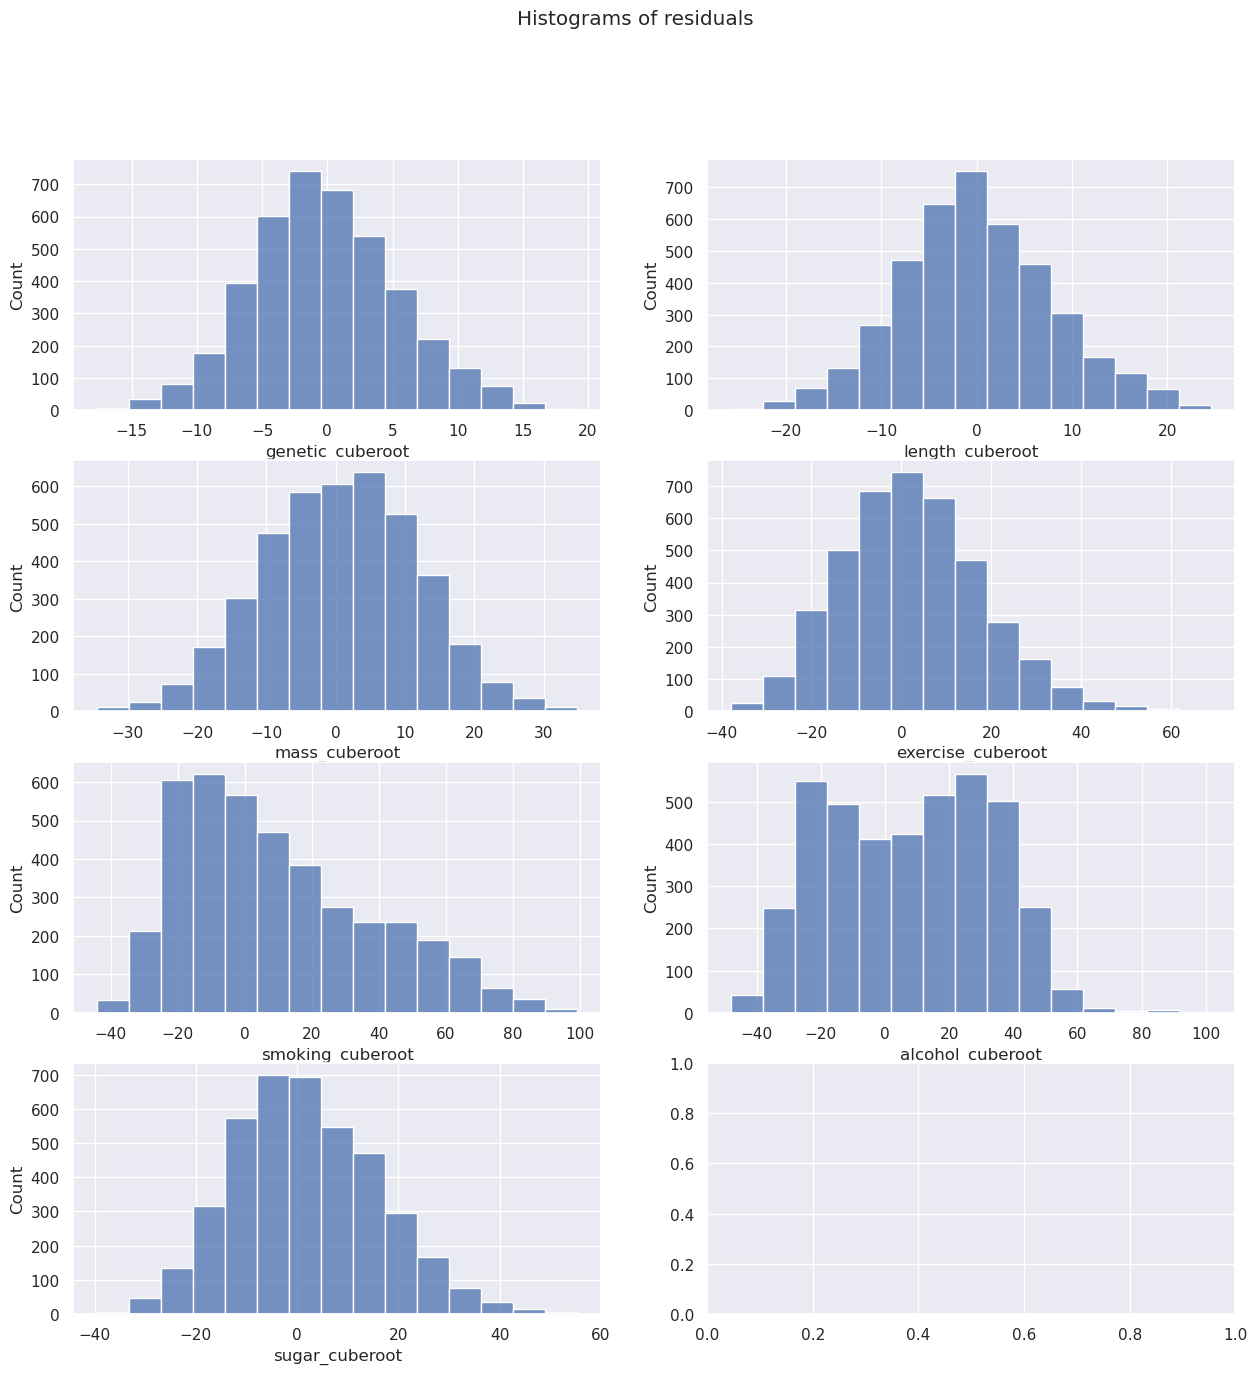

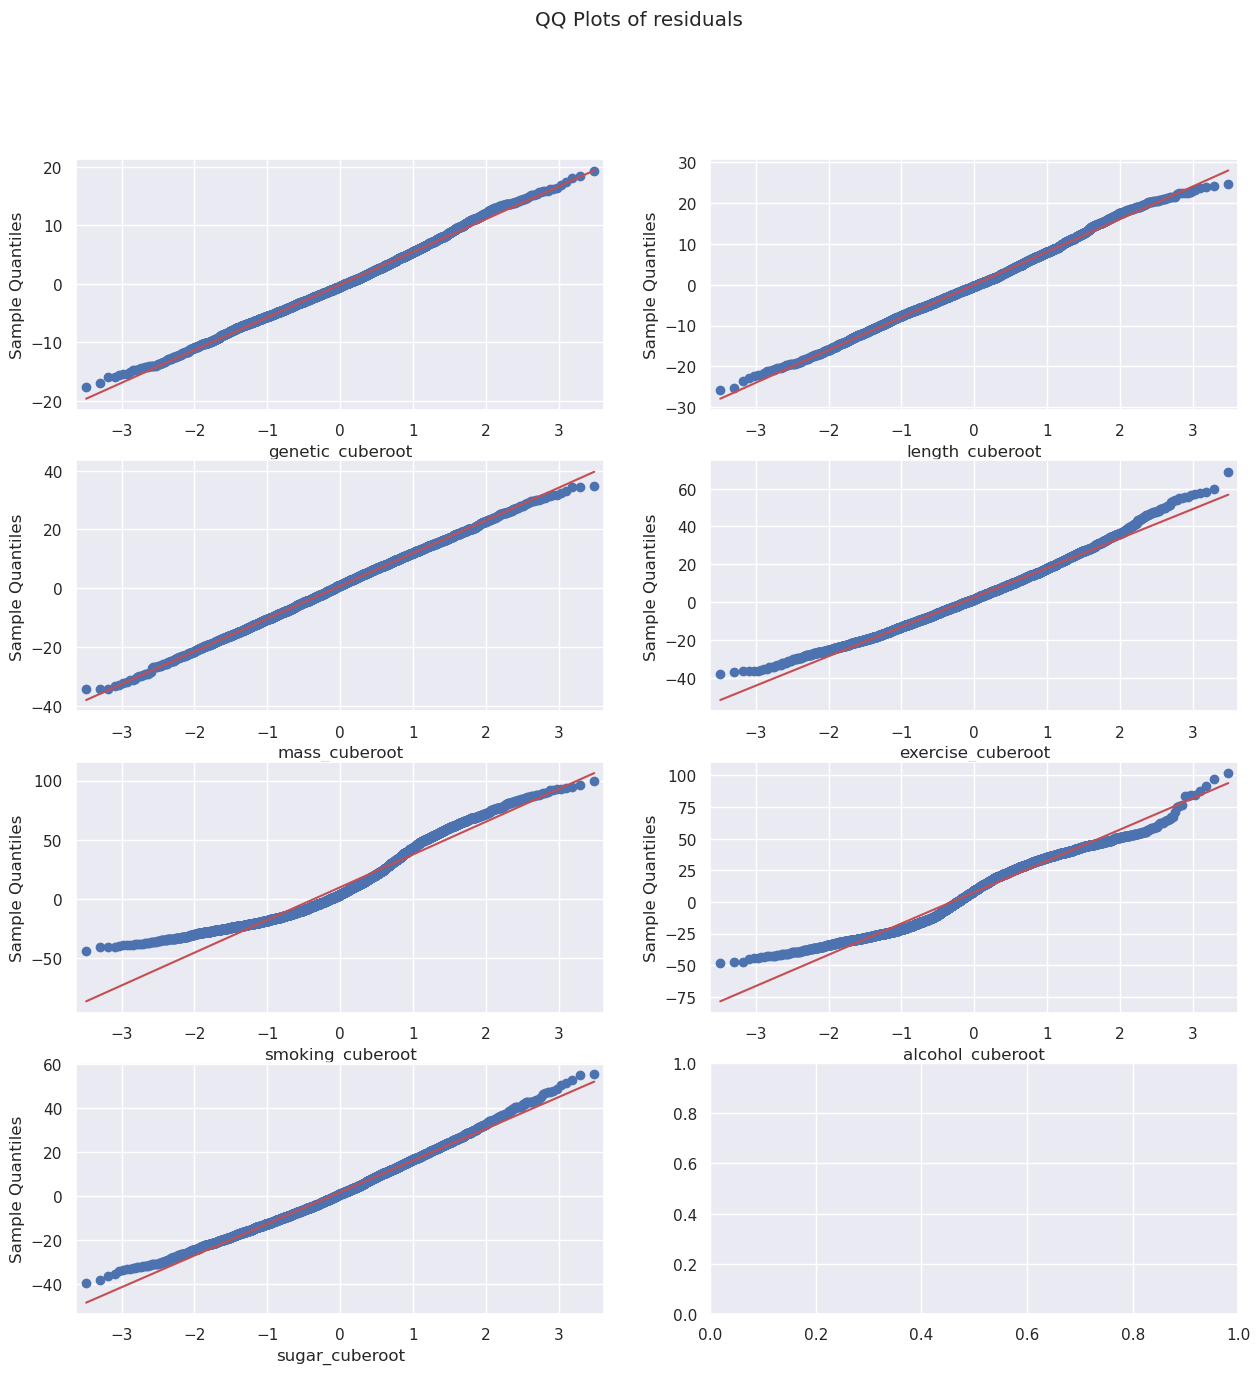

In [172]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Histograms of residuals')

fig2, axes2 = plt.subplots(4, 2, figsize=(15, 15))
fig2.suptitle('QQ Plots of residuals')

k=-1
residuals = []

for i, column in enumerate(df_transformed.loc[:, df_transformed.columns.str.contains('root')].columns):
    l=1
    if i % 2 == 0:
        l=0
        k += 1
        
    model = sm.OLS(df_transformed['lifespan'], df_transformed[column])
    results = model.fit()
    residuals = df_transformed['lifespan'] - results.predict()
    residuals.rename(column, inplace=True)
    sns.histplot(ax=axes[k, l], bins=15, x=residuals)
    sm.qqplot(residuals, ax=axes2[k, l], line='r', xlabel=column)
    print(f"Shapiro-Wilk test for {column.capitalize()} --> p-value: {scipy.stats.shapiro(residuals).pvalue} (p-value > 0.05 means data is normally distributed)")

## Sklearn Power Transformers

### **Summary**

Transforming data with both Box-Cox as Yeo-Johnson does result in the data becoming more normally distributed, but question remains if this will make the future linear regression model perform better. I also read in the second source listed that the independant and dependant variables don't necessary need to be normally distributed for the model to perform well. For now I will start building a model without transformations and checking the residuals plots of the predicted output to see whether or not transformations are necessary.

Source: https://www.datasklr.com/ols-least-squares-regression/transforming-variables#:~:text=Both%20independent%20and%20dependent%20variables,transformation%20of%20the%20target%20variable.<br>
Source: https://data.library.virginia.edu/normality-assumption

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [174]:
# Box-Cox requires non-zero and non-negative values

df_transformed_sklearn = df.copy()

#add one to each value to get rid of 0 values
numeric_cols = [col for col in df_transformed_sklearn if df_transformed_sklearn[col].dtype.kind != 'O']
numeric_cols
df_transformed_sklearn[numeric_cols] += 1
df_transformed_sklearn.head()


genetic  length   mass  exercise  smoking  alcohol  sugar  lifespan
0     74.9   186.0  100.7       1.9      1.0      3.4    7.9      74.1
1     87.0   173.0  106.4       2.8      9.1      1.4    5.2      86.0
2     84.3   177.0  112.4       2.1      1.8      5.6    8.5      82.6
3     83.8   165.0  112.4       5.7     12.8      2.0    3.9      82.0
4     79.7   179.0   72.6       2.5      9.3      5.9    6.5      76.0

In [175]:

# Box-Cox Transform
column_trans = ColumnTransformer(
    [('genetic_bc', PowerTransformer(method='box-cox', standardize=True), ['genetic']),
     ('length_bc', PowerTransformer(method='box-cox', standardize=True), ['length']),
     ('mass_bc', PowerTransformer(method='box-cox', standardize=True), ['mass']),
     ('exercise_bc', PowerTransformer(method='box-cox', standardize=True), ['exercise']),
     ('smoking_bc', PowerTransformer(method='box-cox', standardize=True), ['smoking']),
     ('alcohol_bc', PowerTransformer(method='box-cox', standardize=True), ['alcohol']),
     ('sugar_bc', PowerTransformer(method='box-cox', standardize=True), ['sugar']),
     ('lifespan_bc', PowerTransformer(method='box-cox', standardize=True), ['lifespan']),
    ])

transformed_boxcox = column_trans.fit_transform(df_transformed_sklearn)
new_cols = ['genetic_bc', 'length_bc', 'mass_bc', 'exercise_bc', 'smoking_bc', 'alcohol_bc', 'sugar_bc', 'lifespan_bc']

df_bc = pd.DataFrame(transformed_boxcox, columns=new_cols)
df_bc.describe()

genetic_bc     length_bc       mass_bc   exercise_bc    smoking_bc  \
count  4.084000e+03  4.084000e+03  4.084000e+03  4.084000e+03  4.084000e+03   
mean  -2.554927e-15  1.251366e-15 -6.228558e-16  1.148282e-16 -3.027288e-16   
std    1.000122e+00  1.000122e+00  1.000122e+00  1.000122e+00  1.000122e+00   
min   -2.658236e+00 -2.431870e+00 -1.981578e+00 -2.558629e+00 -1.705615e+00   
25%   -6.104517e-01 -6.972608e-01 -7.739420e-01 -7.309921e-01 -8.488212e-01   
50%   -3.321389e-02  2.198742e-02  1.402880e-02 -6.553194e-02  1.204208e-01   
75%    6.148880e-01  7.281467e-01  7.829835e-01  7.403325e-01  8.867289e-01   
max    2.511275e+00  2.329450e+00  2.235510e+00  2.214059e+00  1.523839e+00   

         alcohol_bc      sugar_bc   lifespan_bc  
count  4.084000e+03  4.084000e+03  4.084000e+03  
mean   2.087785e-17 -1.496246e-16  3.827605e-16  
std    1.000122e+00  1.000122e+00  1.000122e+00  
min   -1.872098e+00 -2.566752e+00 -3.239404e+00  
25%   -9.764100e-01 -7.347070e-01 -6.438356e-01  
50%   -2.813282e-02  2.312380e-03 -3.091348e-02  
75%    1.026030e+00  7.364043e-01  6.586963e-01  
max    1.574497e+00  2.382100e+00  2.946575e+00

Shapiro-Wilk test for Genetic_bc --> p-value: 5.389589579679083e-17 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Length_bc --> p-value: 8.204014193324838e-06 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Mass_bc --> p-value: 7.0142759795999154e-06 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Exercise_bc --> p-value: 2.5936803922377294e-06 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Smoking_bc --> p-value: 4.4989633352088276e-08 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Alcohol_bc --> p-value: 8.075750884017907e-06 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Sugar_bc --> p-value: 8.497972885379568e-06 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Lifespan_bc --> p-value: 1.0 (p-value > 0.05 means data is normally distributed)


/home/elmer/miniconda3/envs/miw_proj1/lib/python3.10/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


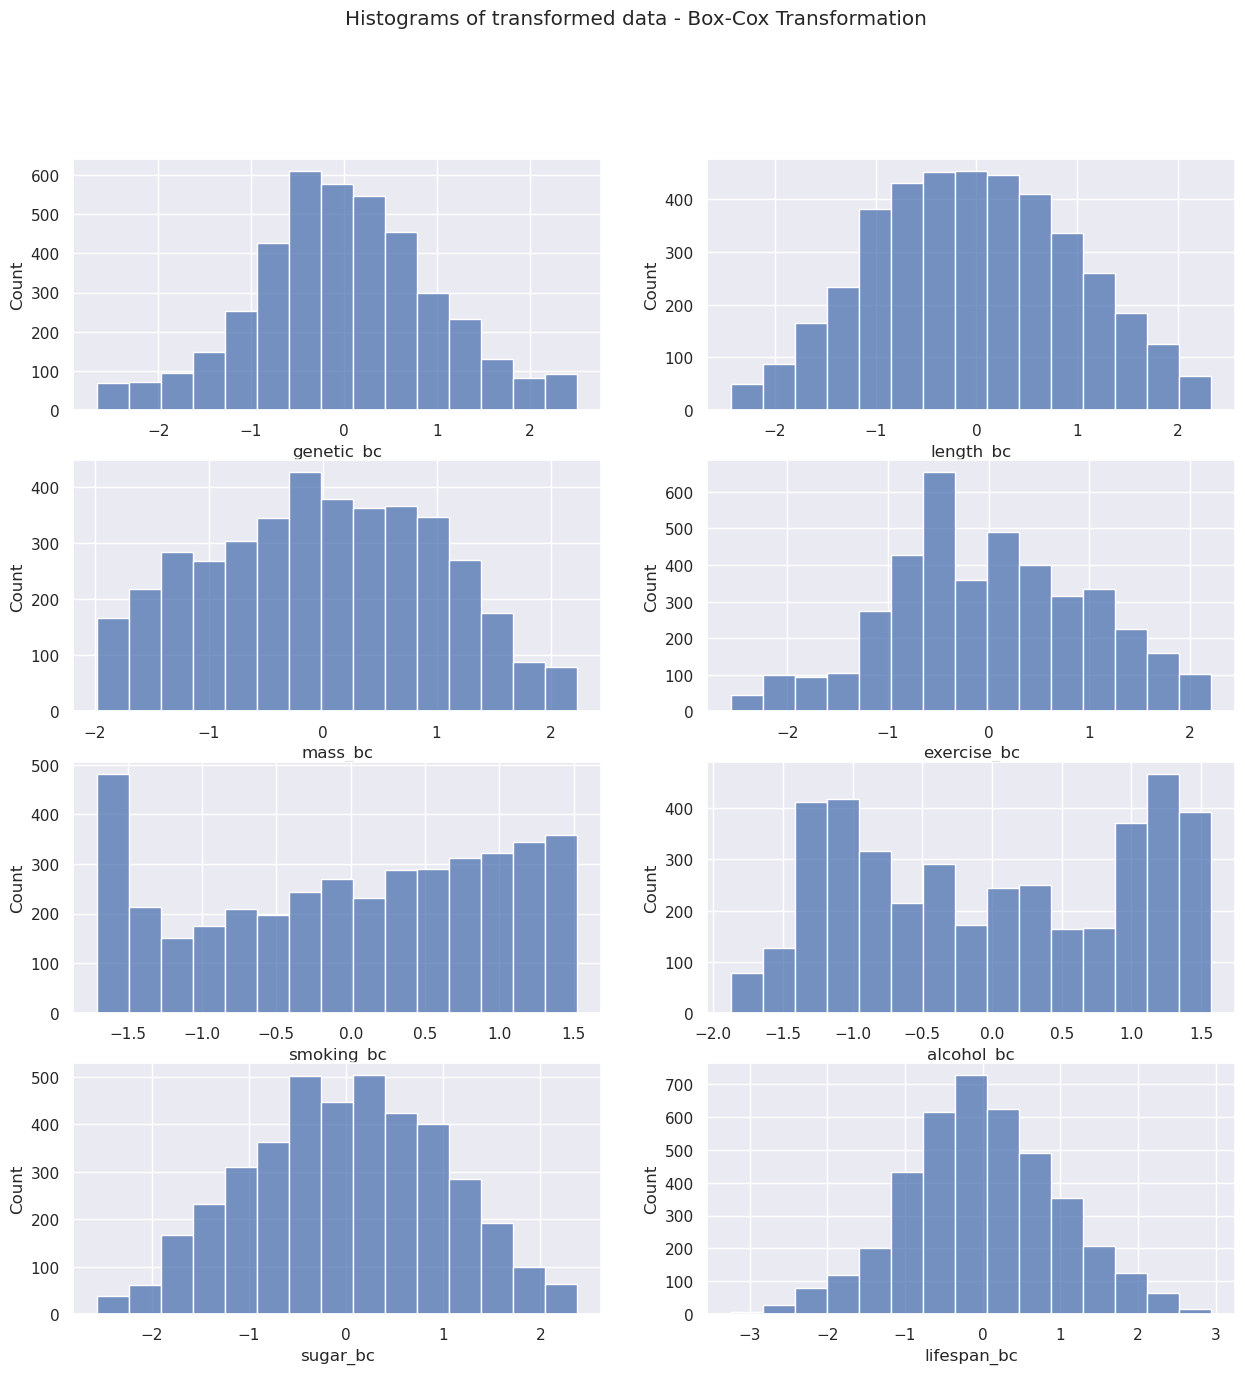

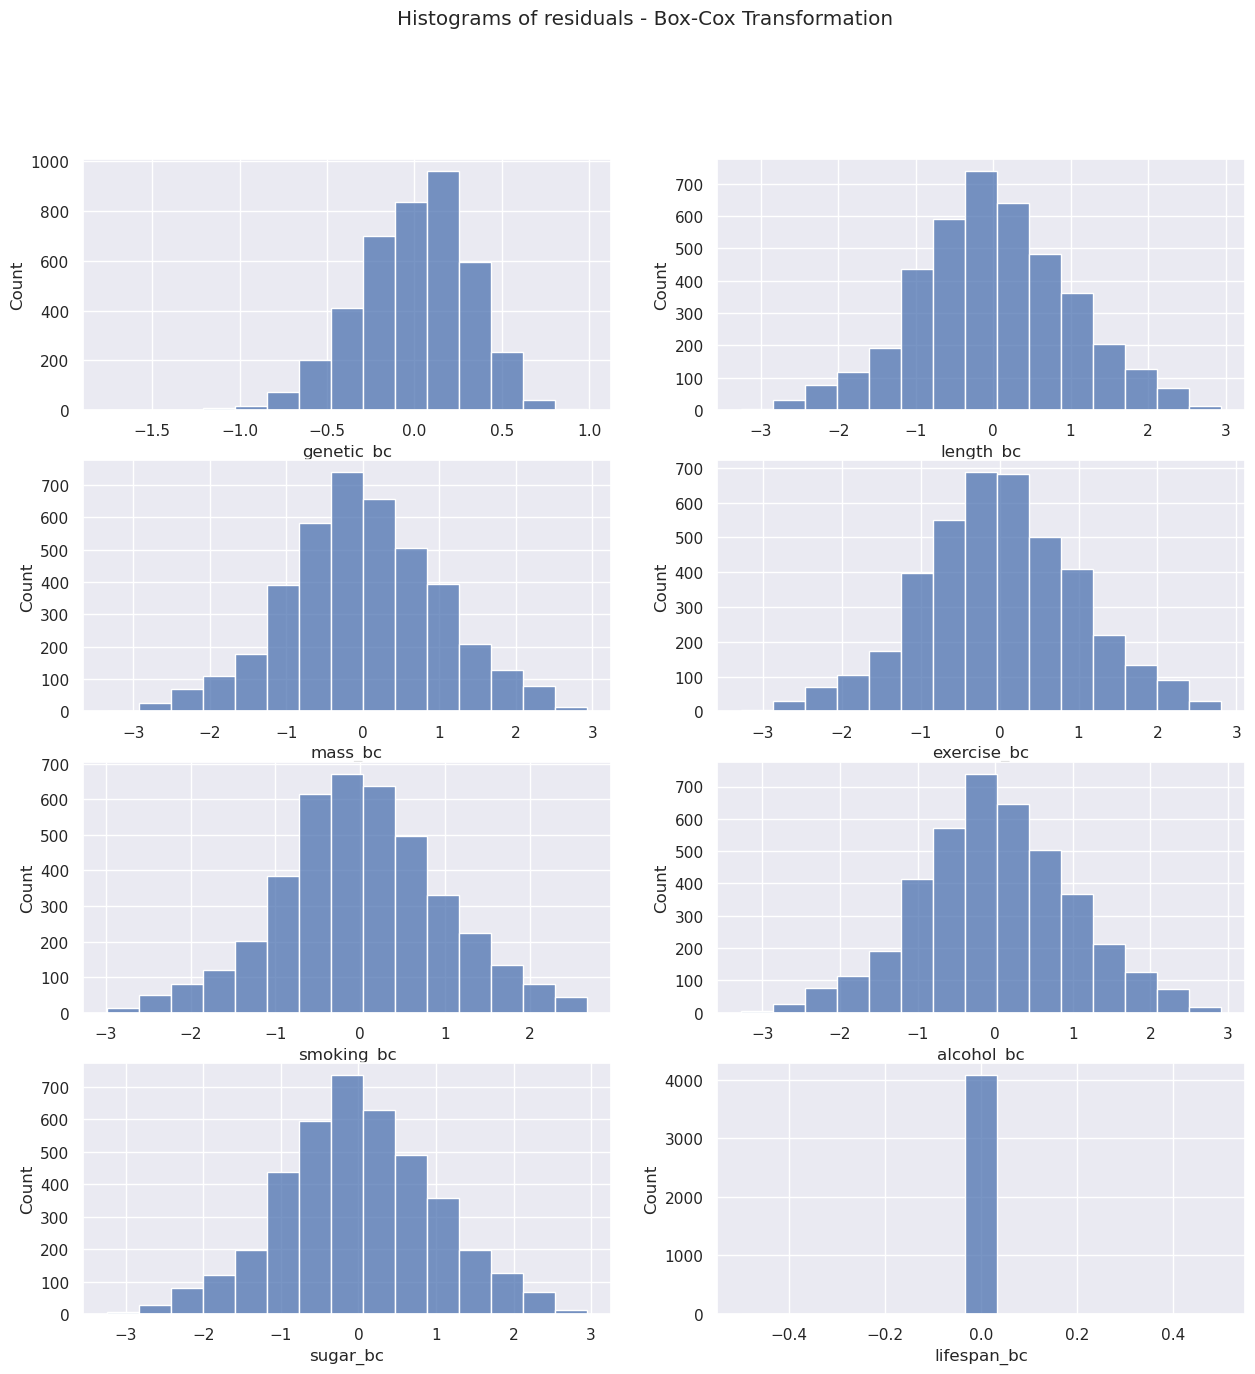

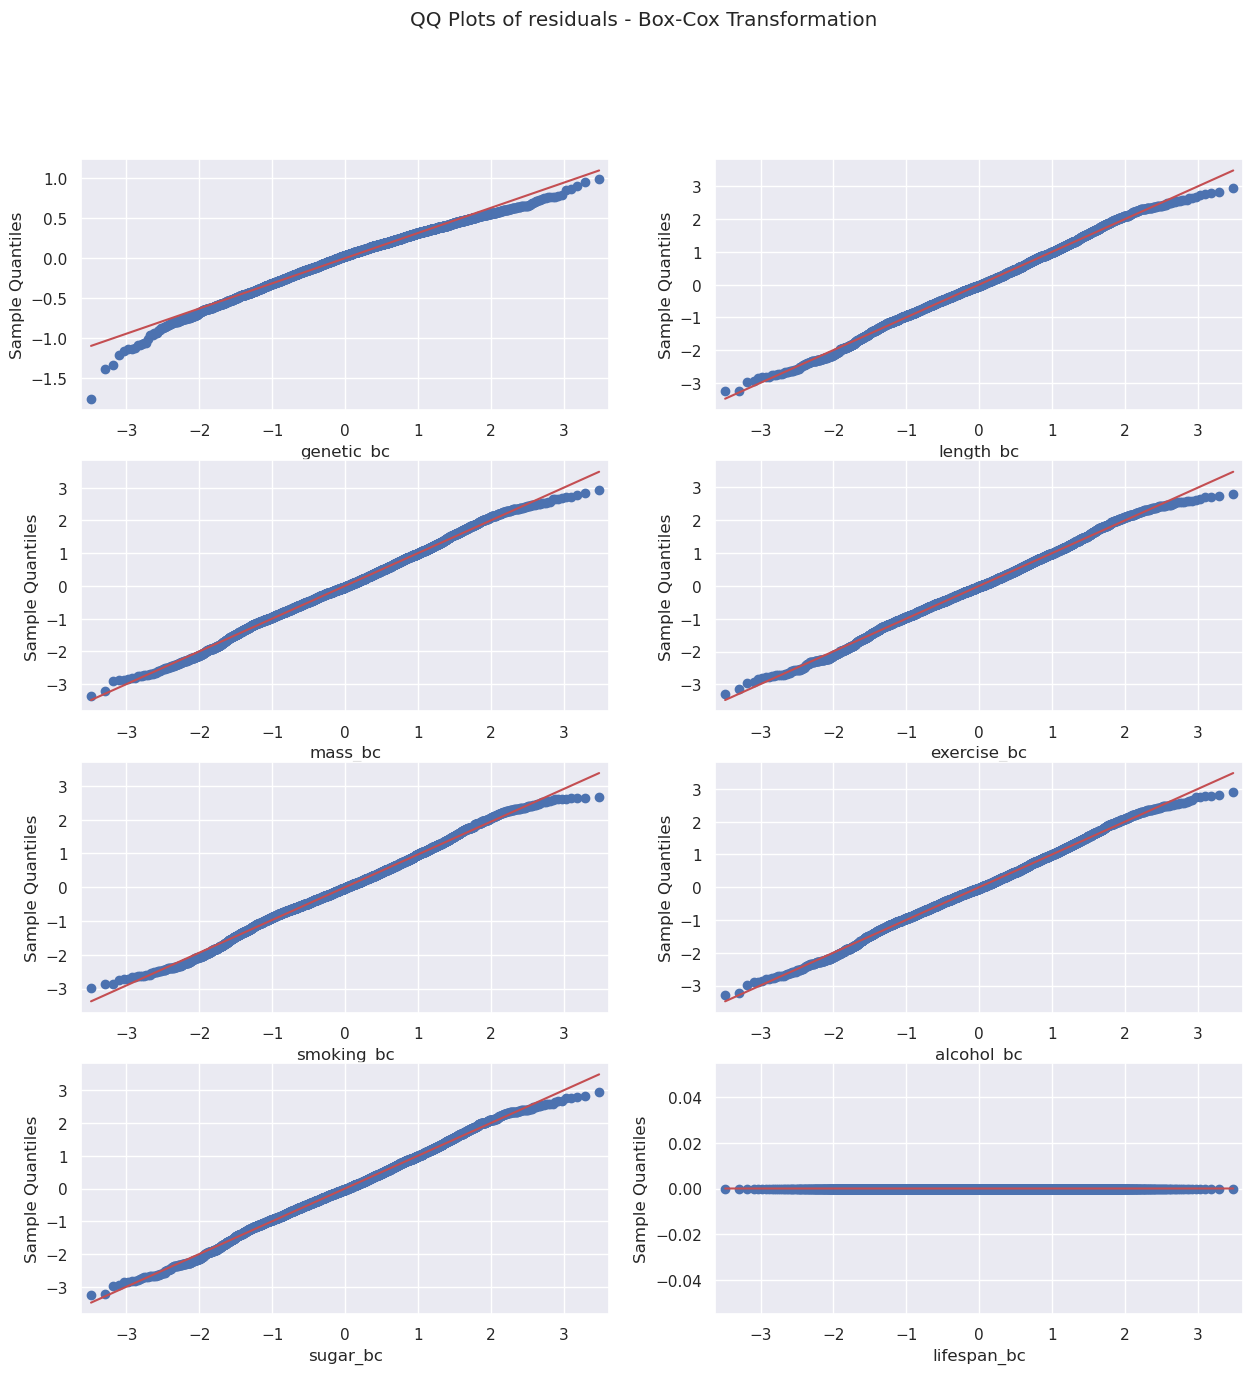

In [176]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Histograms of transformed data - Box-Cox Transformation')

fig, axes2 = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Histograms of residuals - Box-Cox Transformation')

fig2, axes3 = plt.subplots(4, 2, figsize=(15, 15))
fig2.suptitle('QQ Plots of residuals - Box-Cox Transformation')

k=-1
residuals = []

for i, column in enumerate(df_bc.columns):
    l=1
    if i % 2 == 0:
        l=0
        k += 1
        
    model = sm.OLS(df_bc['lifespan_bc'], df_bc[column])
    results = model.fit()
    residuals = df_bc['lifespan_bc'] - results.predict()
    residuals.rename(column, inplace=True)
    sns.histplot(ax=axes[k, l], bins=15, x=df_bc[column])
    sns.histplot(ax=axes2[k, l], bins=15, x=residuals)
    sm.qqplot(residuals, ax=axes3[k, l], line='r', xlabel=column)
    print(f"Shapiro-Wilk test for {column.capitalize()} --> p-value: {scipy.stats.shapiro(residuals).pvalue} (p-value > 0.05 means data is normally distributed)")

In [177]:
# Yeo-Johnson Transform
# Turn on standardize
# YJ takes zero values so we can use original features df

column_trans = ColumnTransformer(
    [('genetic_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['genetic']),
     ('length_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['length']),
     ('mass_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['mass']),
     ('exercise_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['exercise']),
     ('smoking_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['smoking']),
     ('alcohol_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['alcohol']),
     ('sugar_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['sugar']),
     ('lifespan_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['lifespan']),
    ])

transformed_yeojohnson = column_trans.fit_transform(df)
new_cols = ['genetic_yj', 'length_yj', 'mass_yj', 'exercise_yj', 'smoking_yj', 'alcohol_yj', 'sugar_yj', 'lifespan_yj']


df_yj = pd.DataFrame(transformed_yeojohnson, columns=new_cols)
df_yj.describe()

genetic_yj     length_yj       mass_yj   exercise_yj    smoking_yj  \
count  4.084000e+03  4.084000e+03  4.084000e+03  4.084000e+03  4.084000e+03   
mean  -4.807124e-15  3.516612e-15  1.235273e-16 -1.209175e-16 -9.047067e-17   
std    1.000122e+00  1.000122e+00  1.000122e+00  1.000122e+00  1.000122e+00   
min   -2.658236e+00 -2.431870e+00 -1.981578e+00 -2.558629e+00 -1.705615e+00   
25%   -6.104517e-01 -6.972608e-01 -7.739420e-01 -7.309921e-01 -8.488212e-01   
50%   -3.321389e-02  2.198741e-02  1.402880e-02 -6.553193e-02  1.204208e-01   
75%    6.148880e-01  7.281467e-01  7.829835e-01  7.403325e-01  8.867289e-01   
max    2.511275e+00  2.329450e+00  2.235510e+00  2.214059e+00  1.523839e+00   

         alcohol_yj      sugar_yj   lifespan_yj  
count  4.084000e+03  4.084000e+03  4.084000e+03  
mean  -1.618033e-16 -1.496246e-16 -1.965997e-16  
std    1.000122e+00  1.000122e+00  1.000122e+00  
min   -1.872098e+00 -2.566752e+00 -3.239404e+00  
25%   -9.764100e-01 -7.347070e-01 -6.438356e-01  
50%   -2.813282e-02  2.312381e-03 -3.091348e-02  
75%    1.026030e+00  7.364043e-01  6.586963e-01  
max    1.574497e+00  2.382100e+00  2.946575e+00

Shapiro-Wilk test for Genetic_yj --> p-value: 5.389589579679083e-17 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Length_yj --> p-value: 8.204014193324838e-06 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Mass_yj --> p-value: 7.0142759795999154e-06 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Exercise_yj --> p-value: 2.5936803922377294e-06 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Smoking_yj --> p-value: 4.4989633352088276e-08 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Alcohol_yj --> p-value: 8.075750884017907e-06 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Sugar_yj --> p-value: 8.497972885379568e-06 (p-value > 0.05 means data is normally distributed)
Shapiro-Wilk test for Lifespan_yj --> p-value: 3.4664605476723503e-32 (p-value > 0.05 means data is normally distributed)


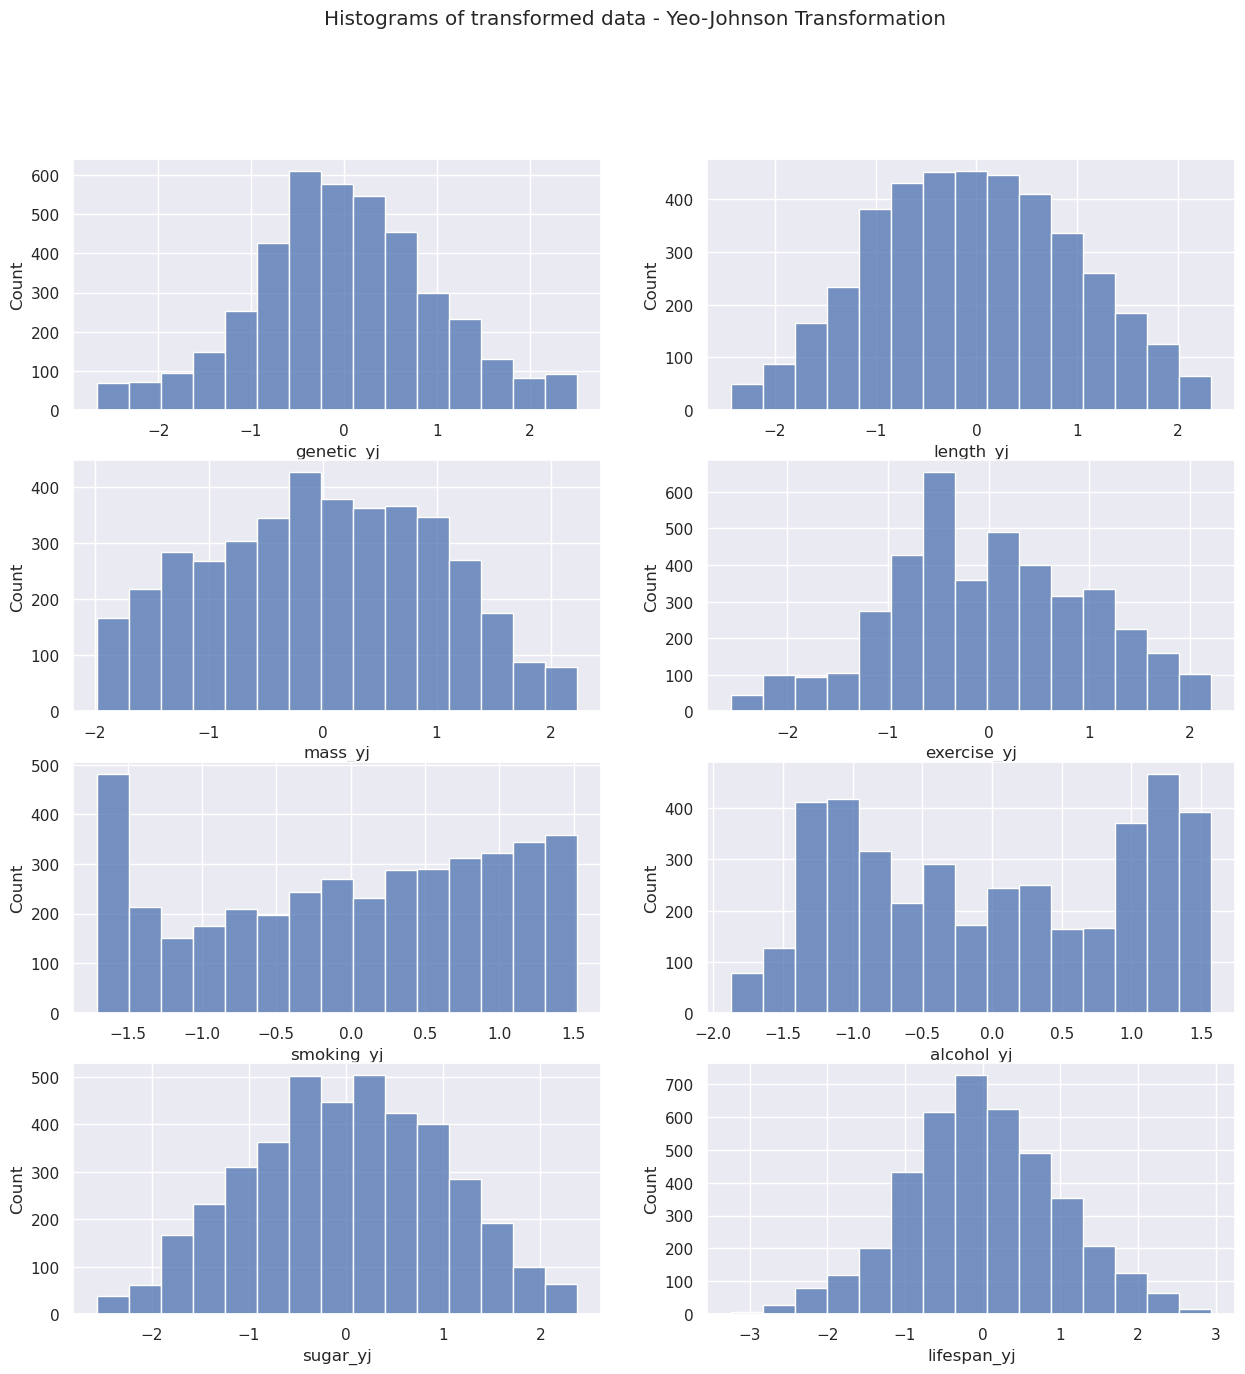

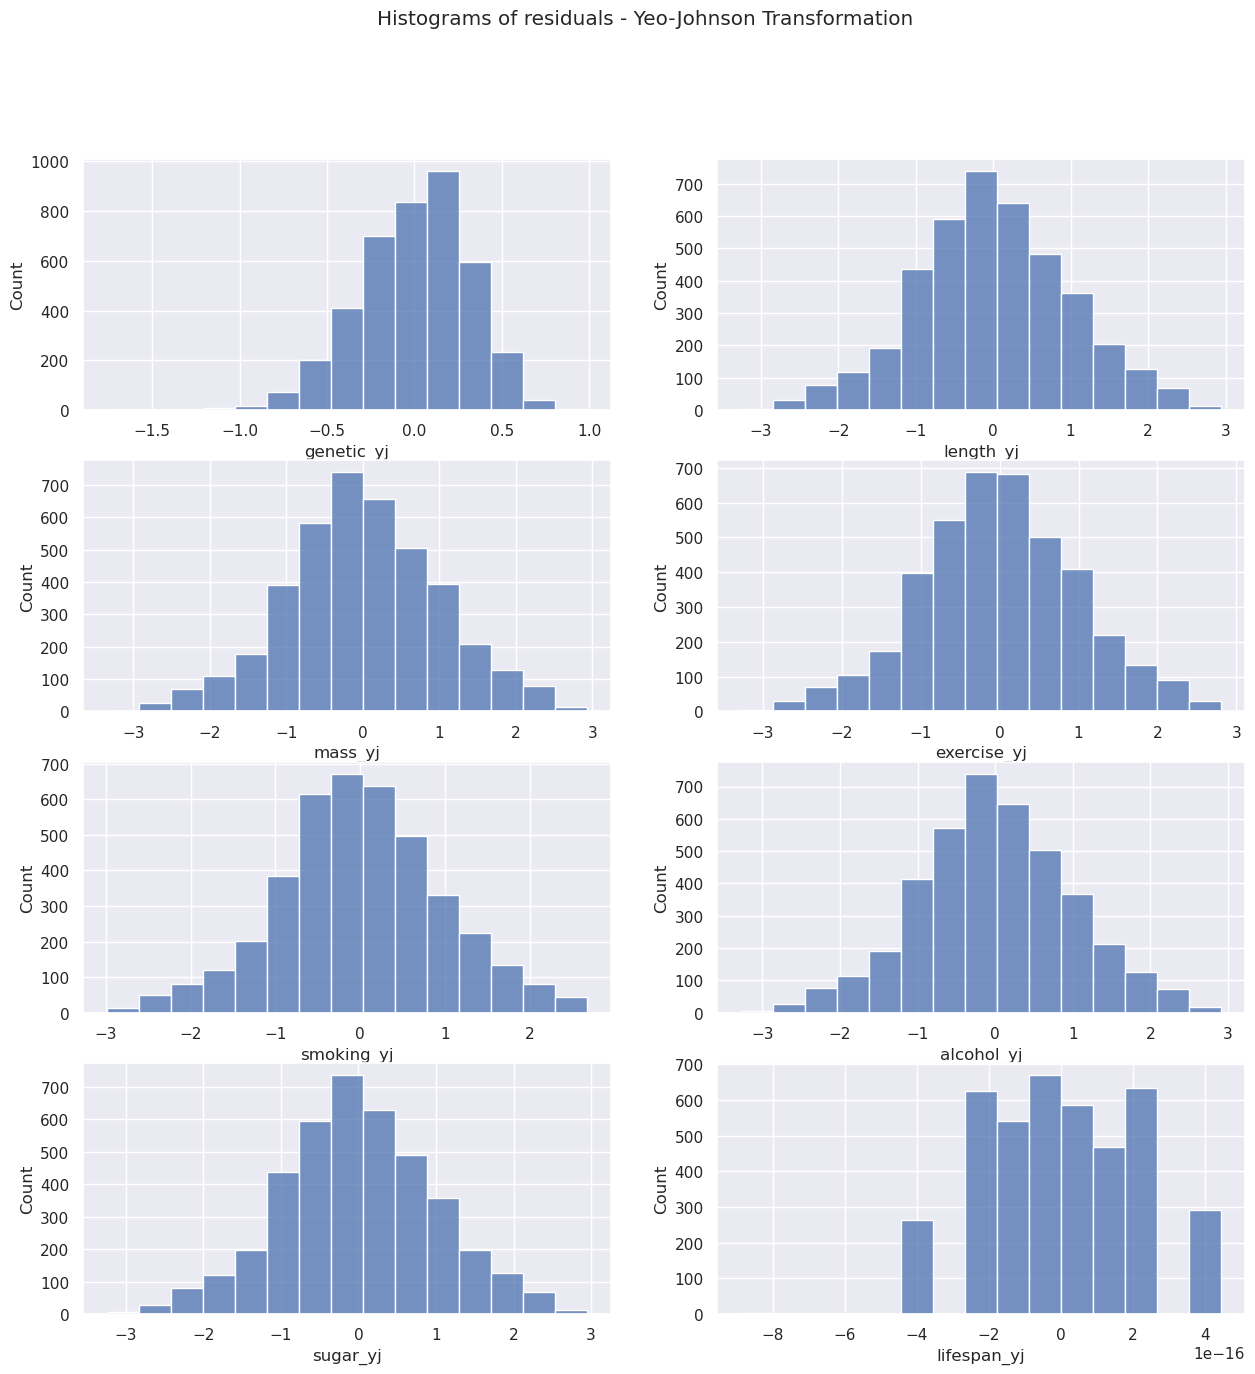

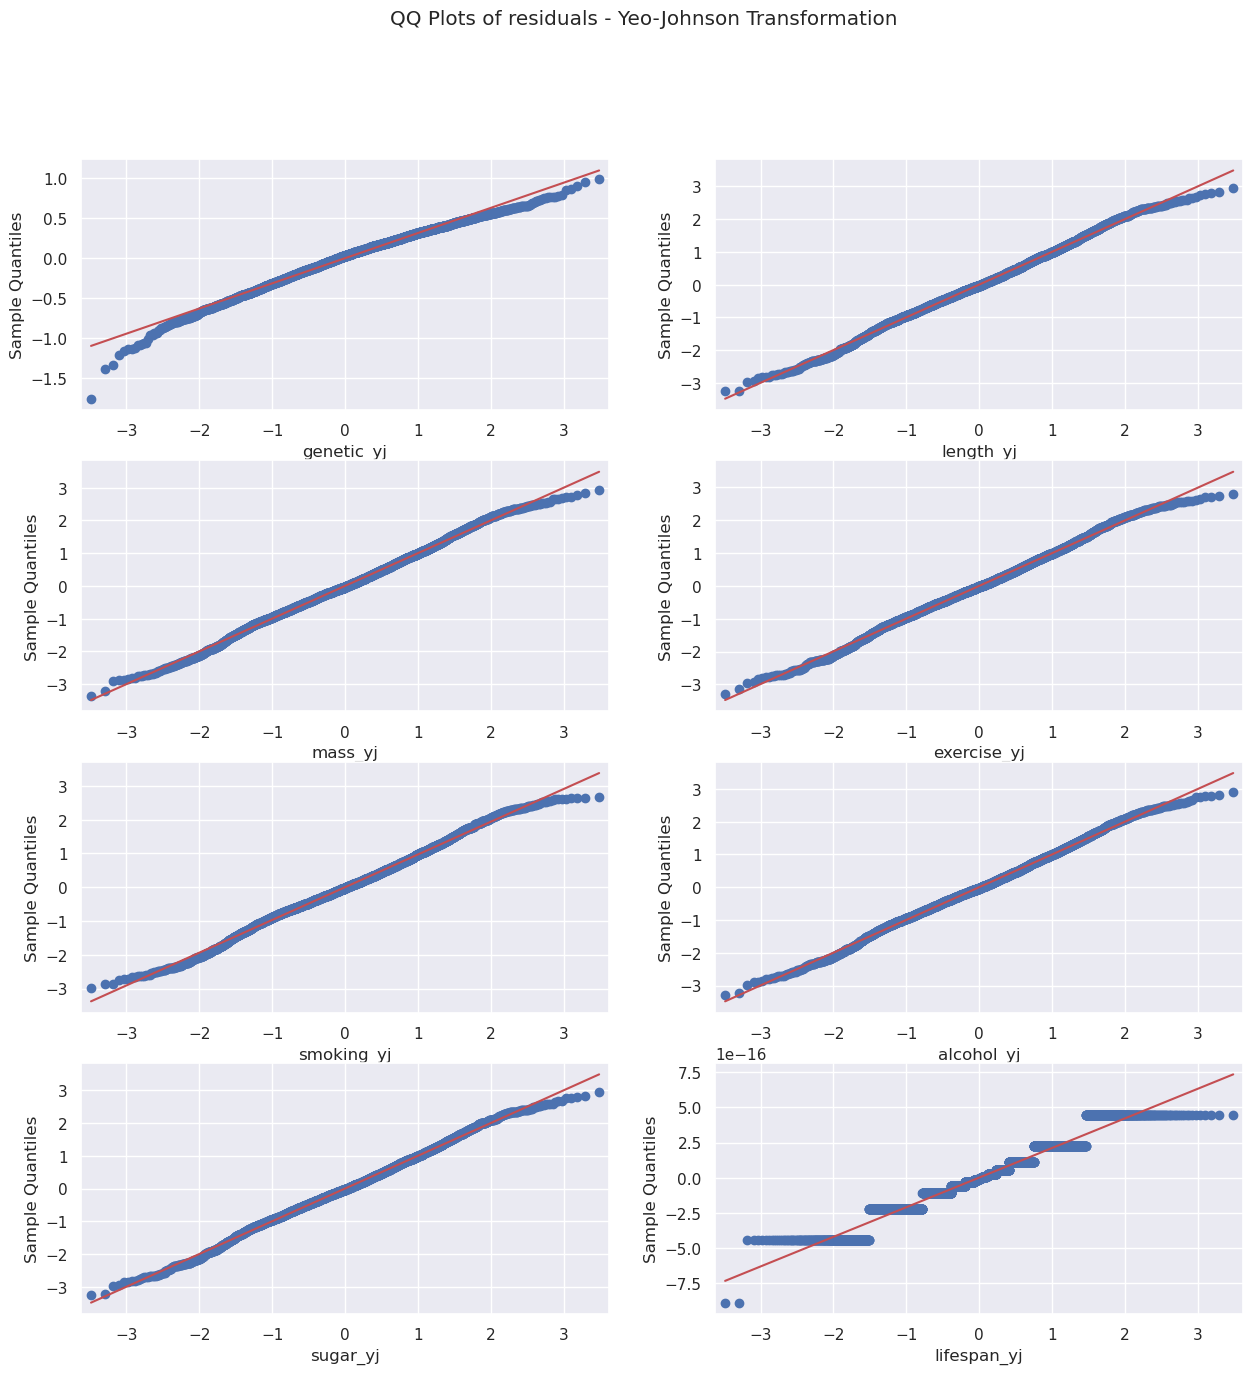

In [178]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Histograms of transformed data - Yeo-Johnson Transformation')

fig, axes2 = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Histograms of residuals - Yeo-Johnson Transformation')

fig2, axes3 = plt.subplots(4, 2, figsize=(15, 15))
fig2.suptitle('QQ Plots of residuals - Yeo-Johnson Transformation')

k=-1
residuals = []

for i, column in enumerate(df_yj.columns):
    l=1
    if i % 2 == 0:
        l=0
        k += 1
        
    model = sm.OLS(df_yj['lifespan_yj'], df_yj[column])
    results = model.fit()
    residuals = df_yj['lifespan_yj'] - results.predict()
    residuals.rename(column, inplace=True)
    sns.histplot(ax=axes[k, l], bins=15, x=df_yj[column])
    sns.histplot(ax=axes2[k, l], bins=15, x=residuals)
    sm.qqplot(residuals, ax=axes3[k, l], line='r', xlabel=column)
    print(f"Shapiro-Wilk test for {column.capitalize()} --> p-value: {scipy.stats.shapiro(residuals).pvalue} (p-value > 0.05 means data is normally distributed)")

In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

In [180]:
df.loc[:, ~df.columns.isin(['lifespan'])].columns

Index(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar'], dtype='object')

## Finding trends

I am going to plot several boxplots to find trends in the data. This includes creating bins to find trends in the data between both independant as between independant and dependant variables.

In [181]:
# Create category showing if the person smokes yes or no
df['is_smoking'] = np.where(df['smoking'] == 0, 'Non-Smoking', 'Smoking')
df['is_smoking'].value_counts()

Smoking        4031
Non-Smoking      53
Name: is_smoking, dtype: int64

<AxesSubplot: xlabel='lifespan', ylabel='is_smoking'>

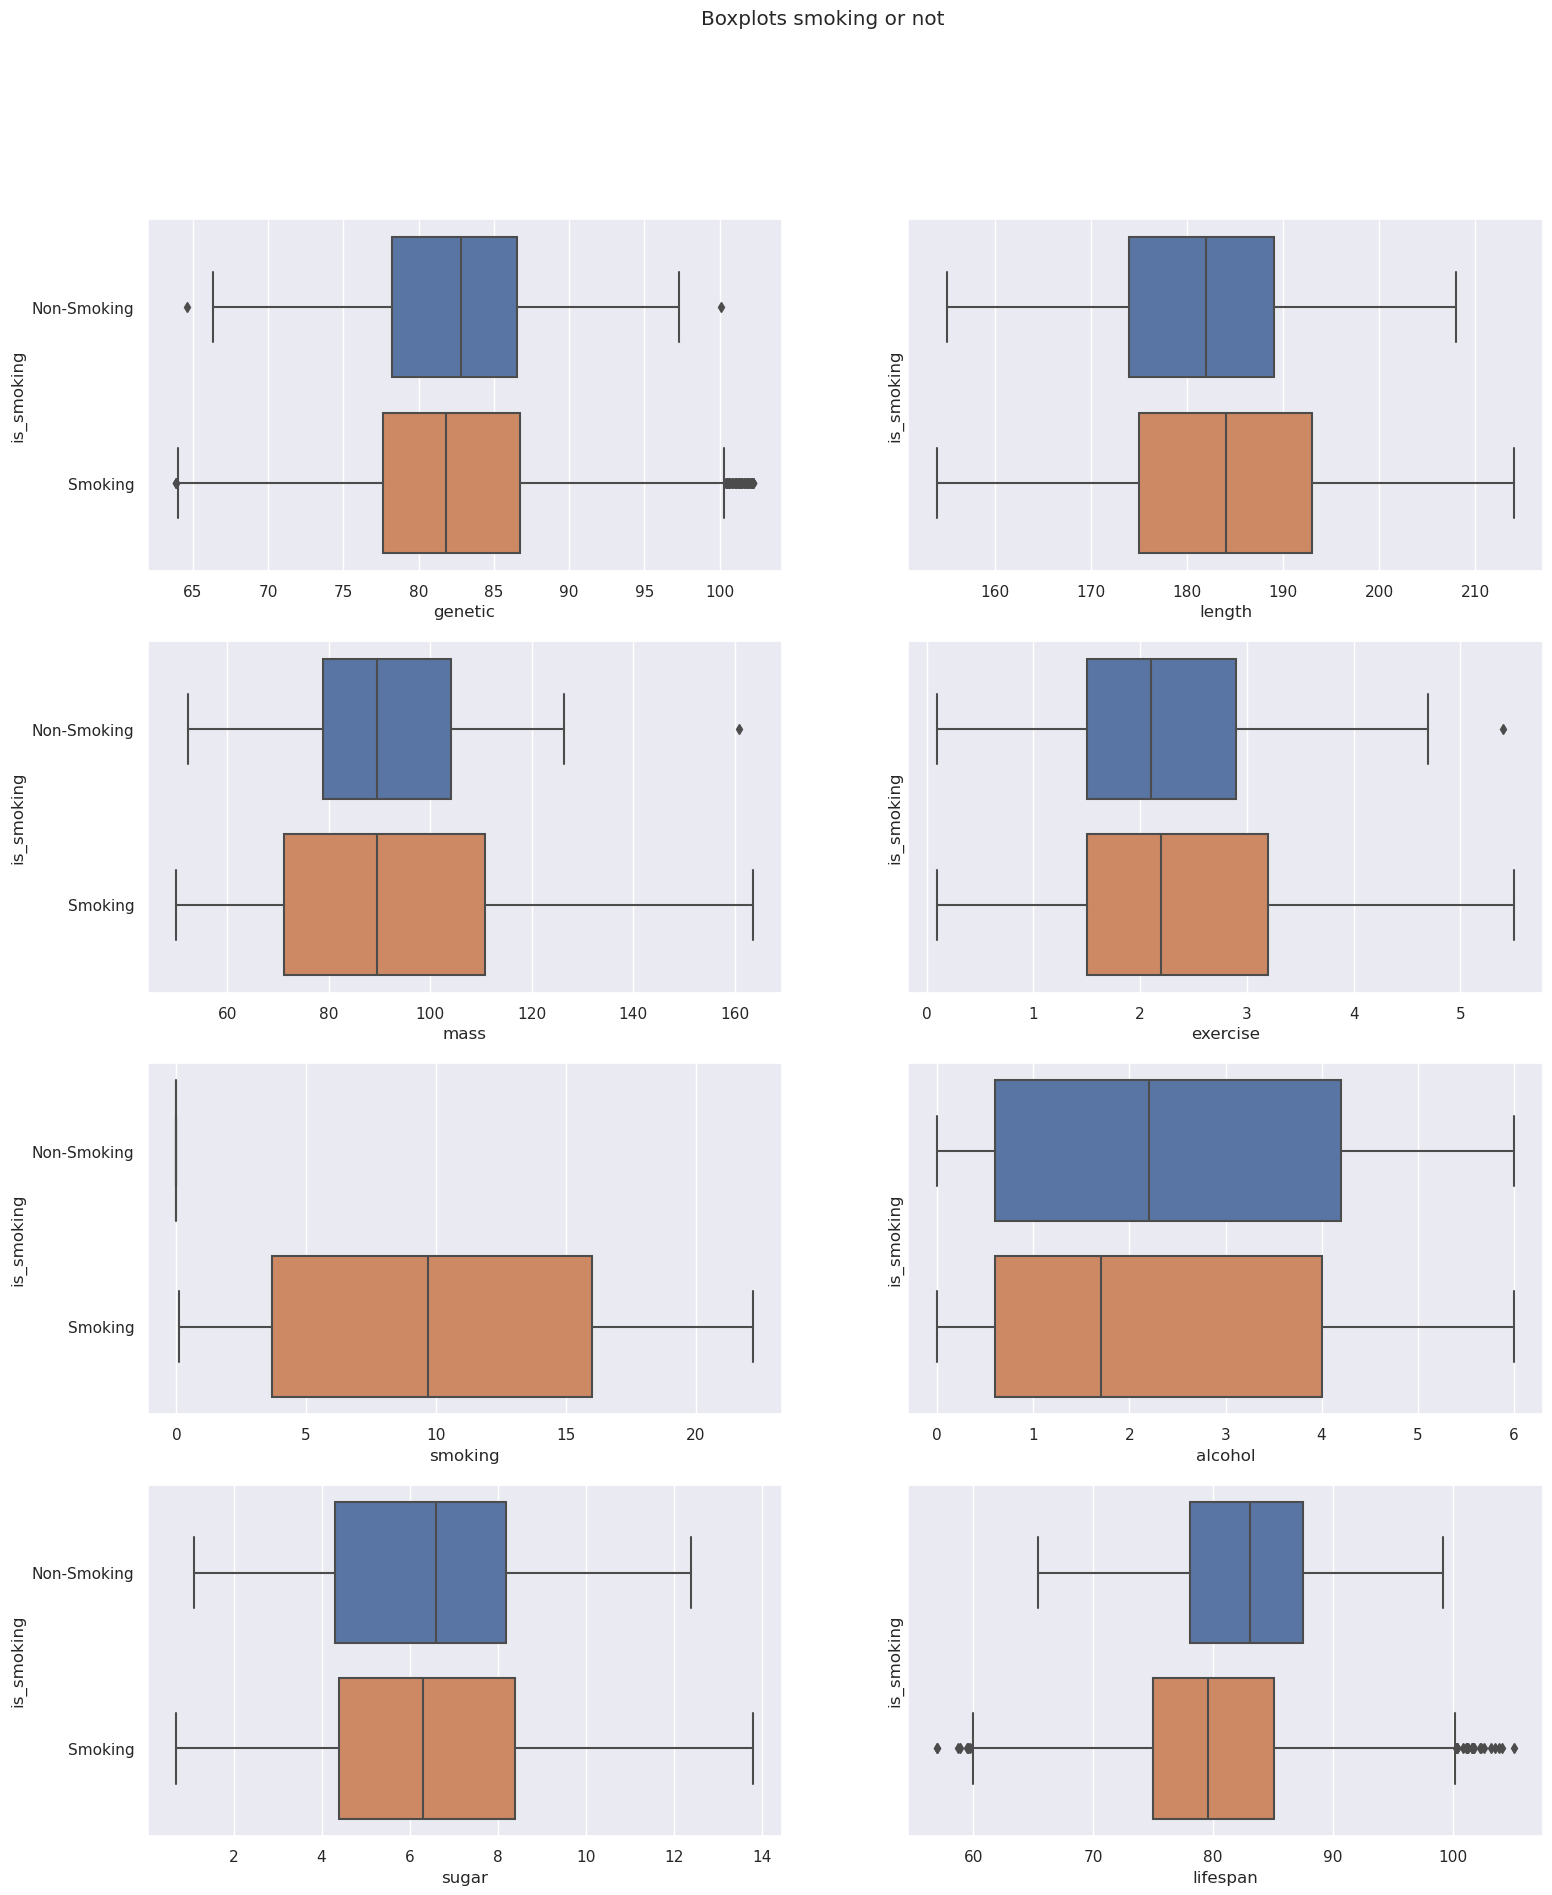

In [182]:
# Plot boxplots of parameters against is_smoking
fig, axes = plt.subplots(4, 2, figsize=(18, 21), sharey=True)
fig.suptitle('Boxplots smoking or not')
sns.boxplot(ax=axes[0, 0], x=df['genetic'], y=df['is_smoking'])
sns.boxplot(ax=axes[0, 1], x=df['length'], y=df['is_smoking'])
sns.boxplot(ax=axes[1, 0], x=df['mass'], y=df['is_smoking'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'], y=df['is_smoking'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'], y=df['is_smoking'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'], y=df['is_smoking'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'], y=df['is_smoking'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'], y=df['is_smoking'])

<AxesSubplot: xlabel='lifespan', ylabel='Sugar cubes'>

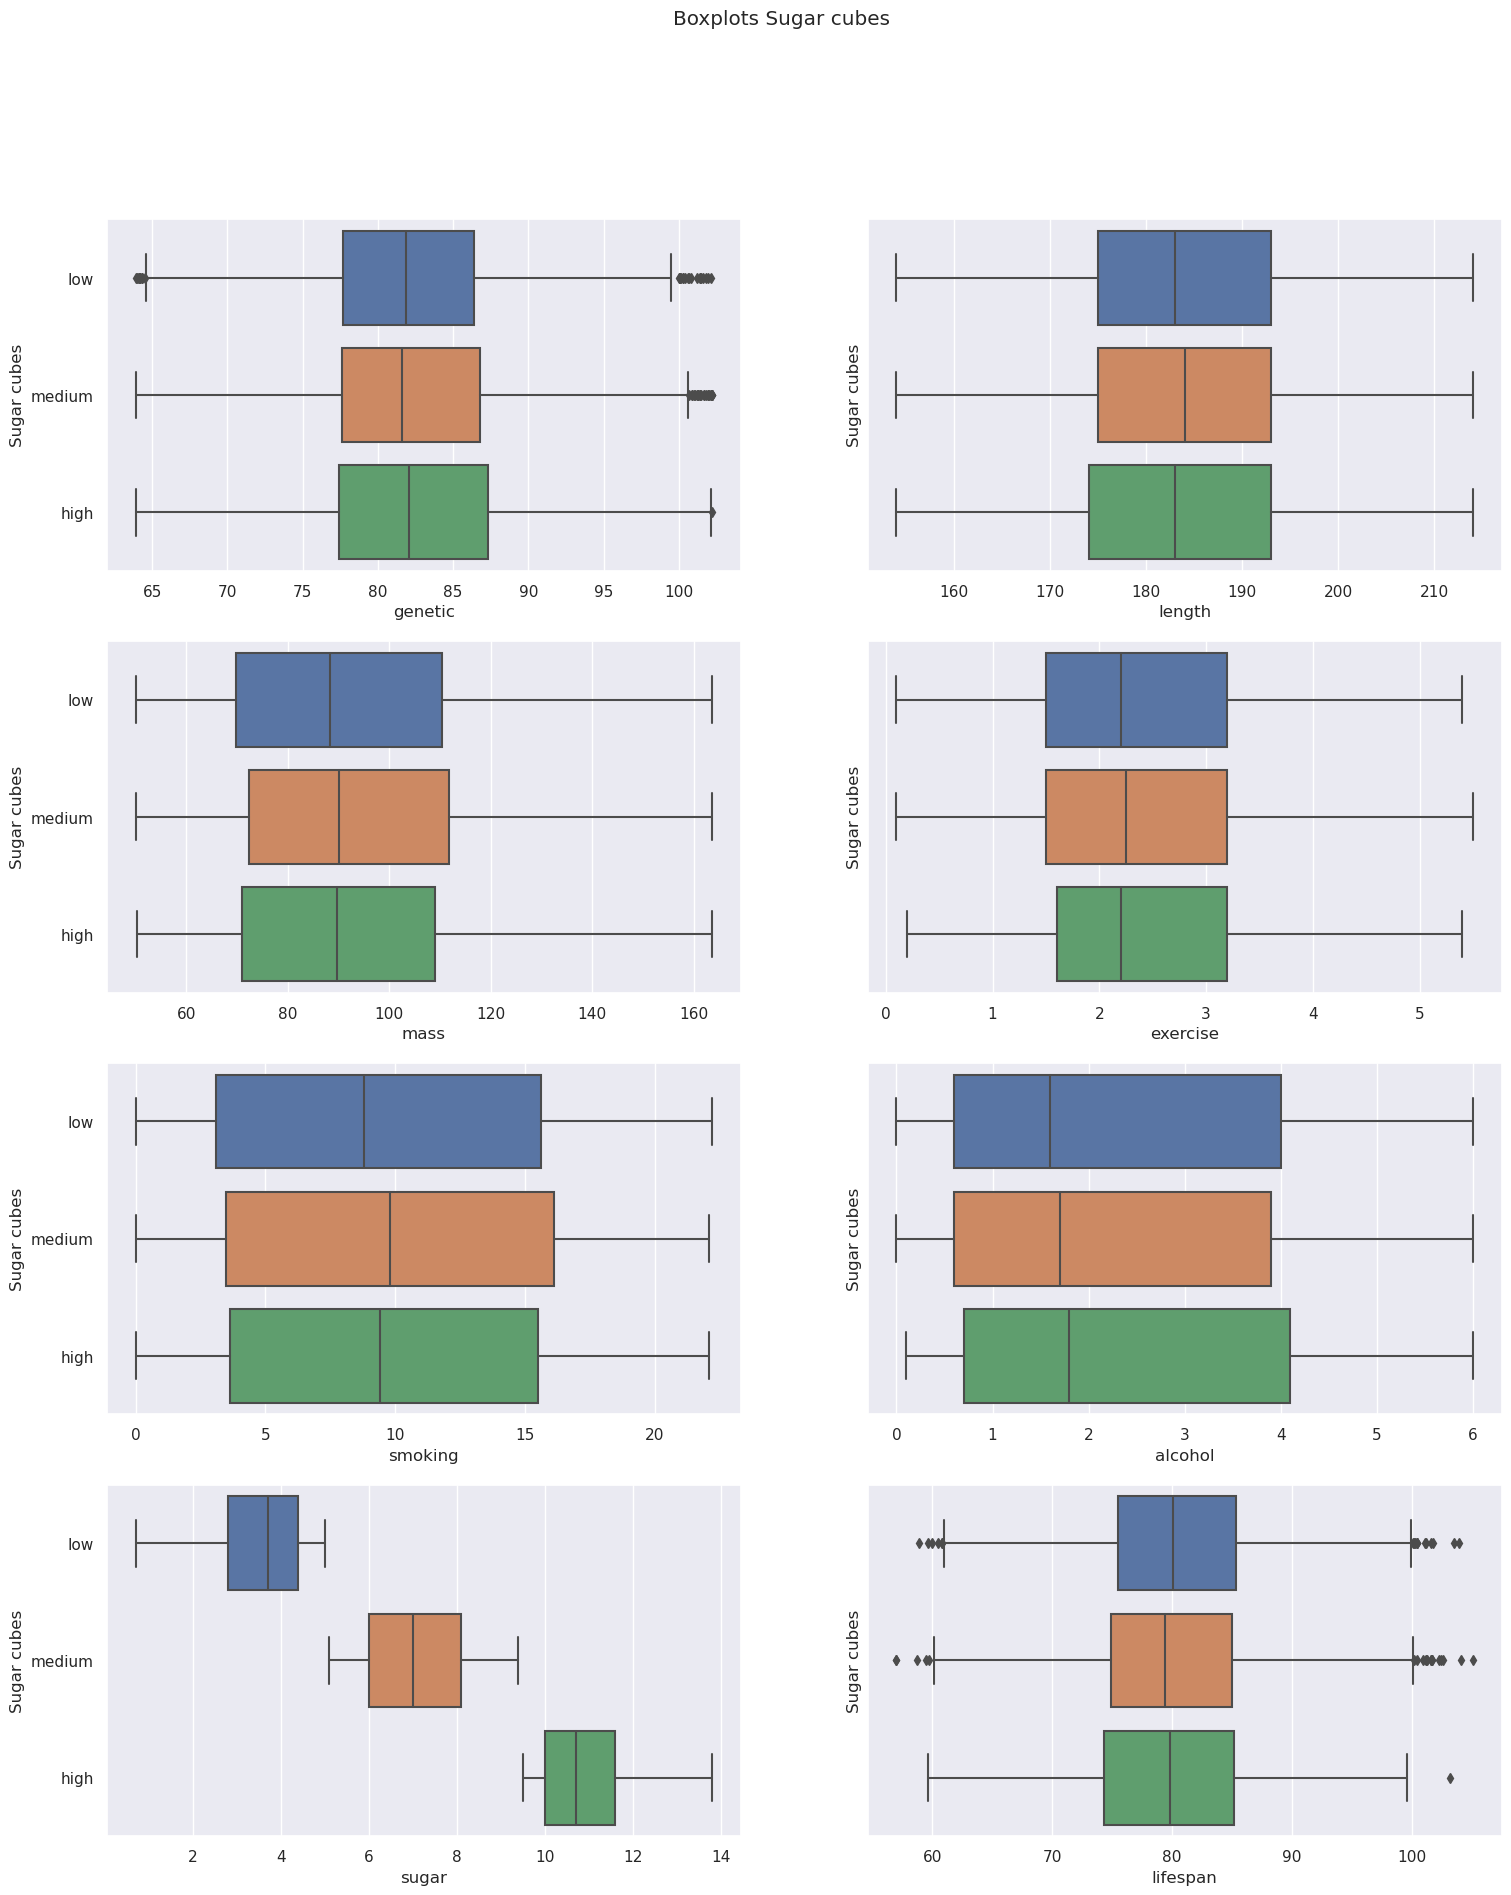

In [183]:
# Create categories of sugar cubes, alcohol intake and weight
df['Sugar cubes'] = pd.cut(df['sugar'], bins=3, labels=['low', 'medium', 'high'])
df['Alcohol intake'] = pd.cut(df['alcohol'], bins=3, labels=['low', 'medium', 'high'])
df['Weight'] = pd.cut(df['mass'], bins=3, labels=['Below average', 'At average', 'Above average'])

# Plot boxplots of parameters against sugar cubes
fig, axes = plt.subplots(4, 2, figsize=(18, 21), sharey=True)
fig.suptitle('Boxplots Sugar cubes')
sns.boxplot(ax=axes[0, 0], x=df['genetic'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[0, 1], x=df['length'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[1, 0], x=df['mass'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'], y=df['Sugar cubes'])

<AxesSubplot: xlabel='lifespan', ylabel='Alcohol intake'>

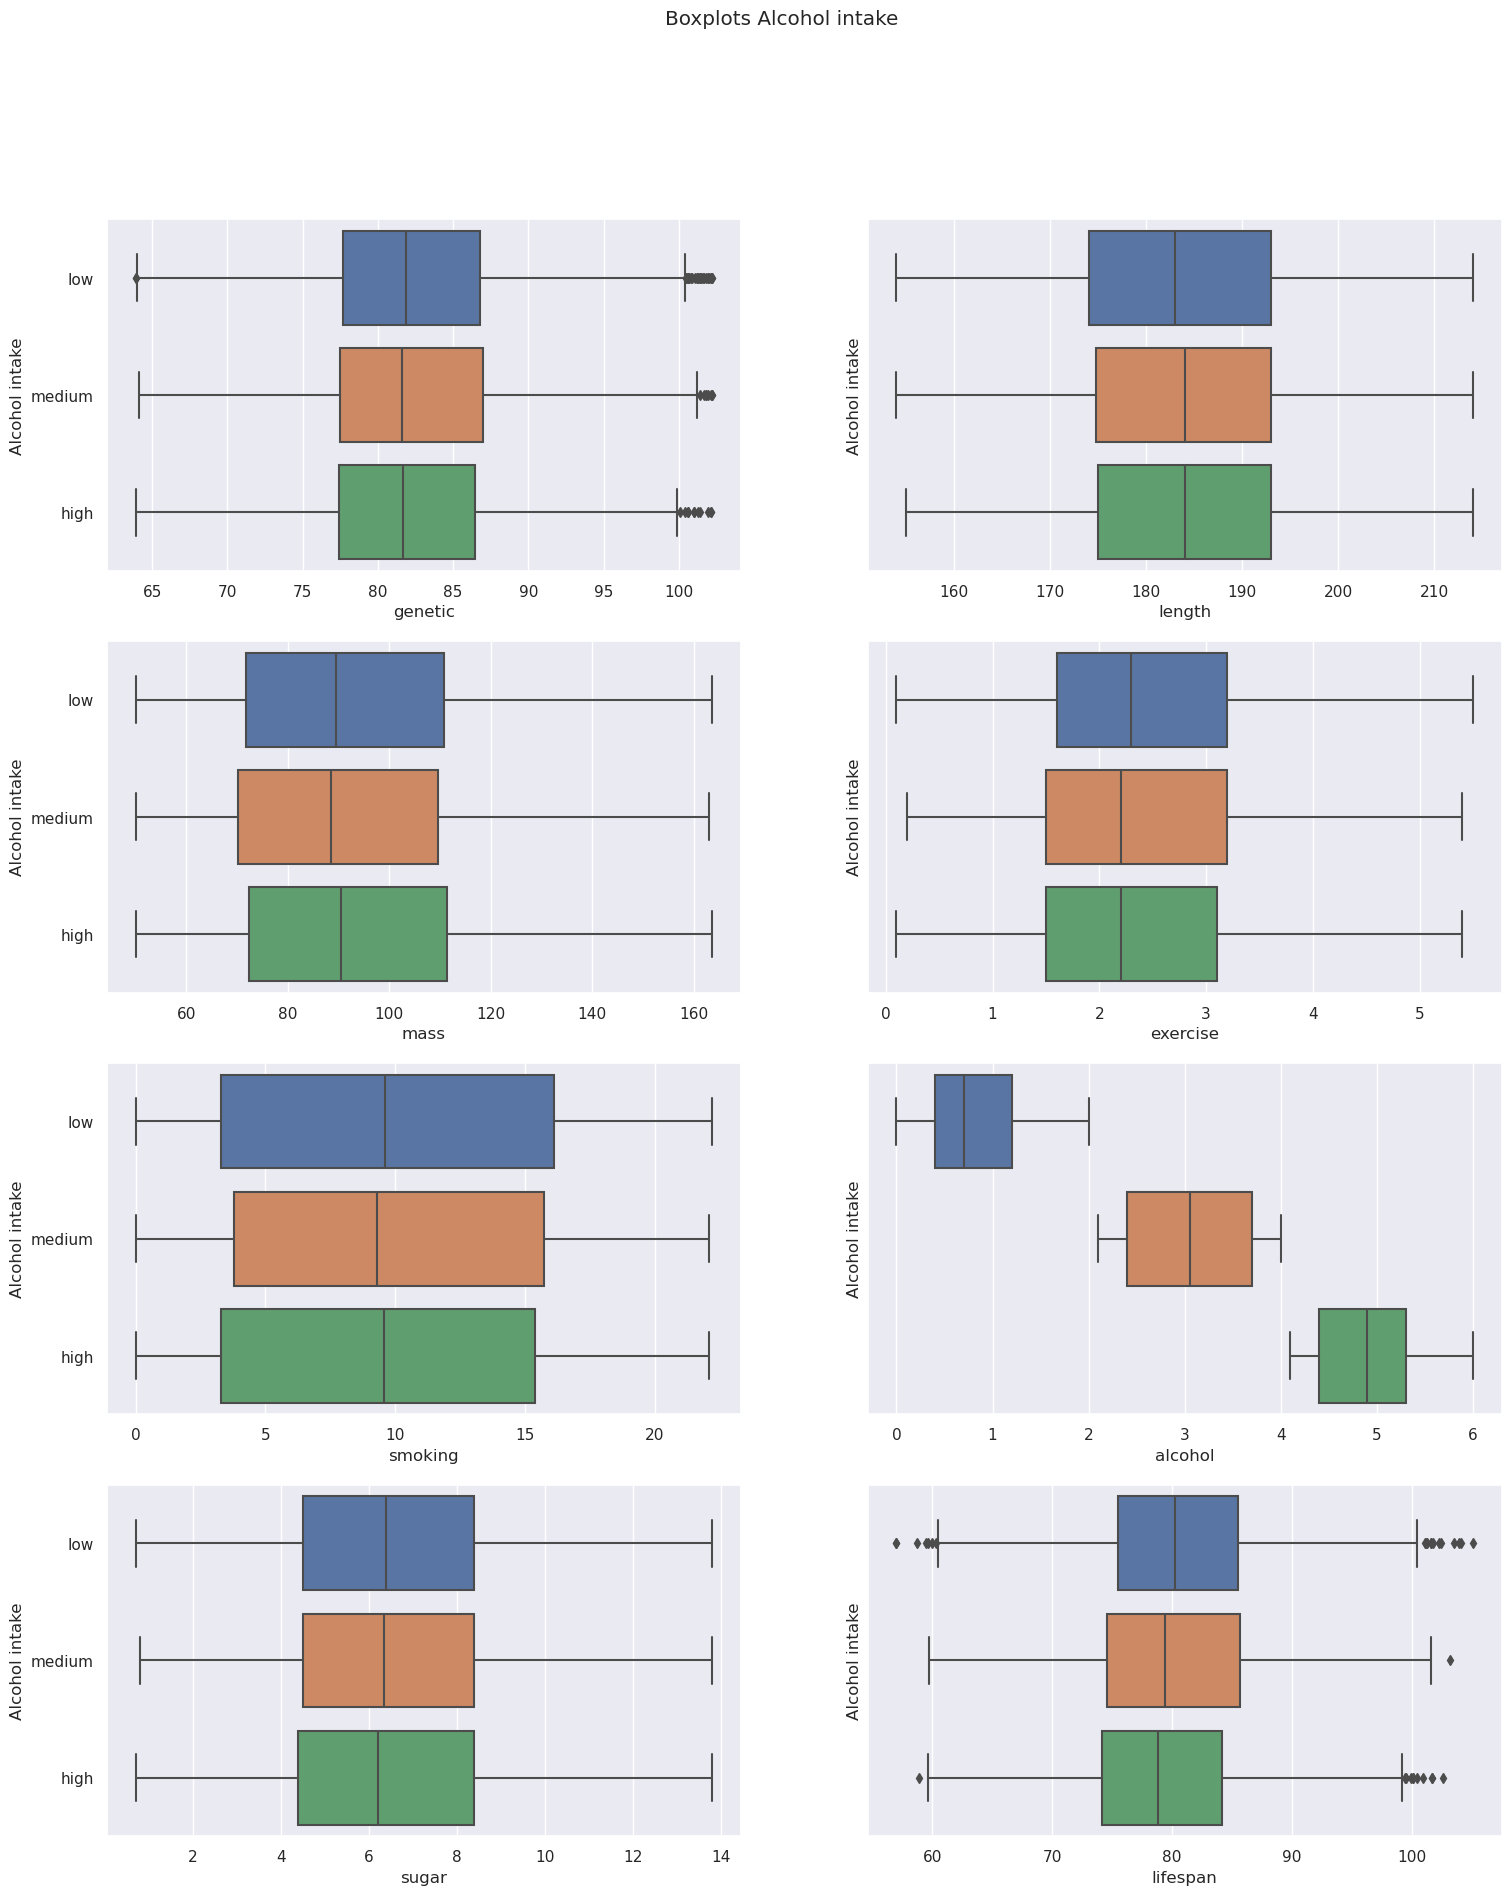

In [184]:
# Plot boxplots of parameters against Alcohol intake

fig, axes = plt.subplots(4, 2, figsize=(18, 21), sharey=True)
fig.suptitle('Boxplots Alcohol intake')
sns.boxplot(ax=axes[0, 0], x=df['genetic'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[0, 1], x=df['length'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[1, 0], x=df['mass'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'], y=df['Alcohol intake'])

<AxesSubplot: xlabel='lifespan', ylabel='Weight'>

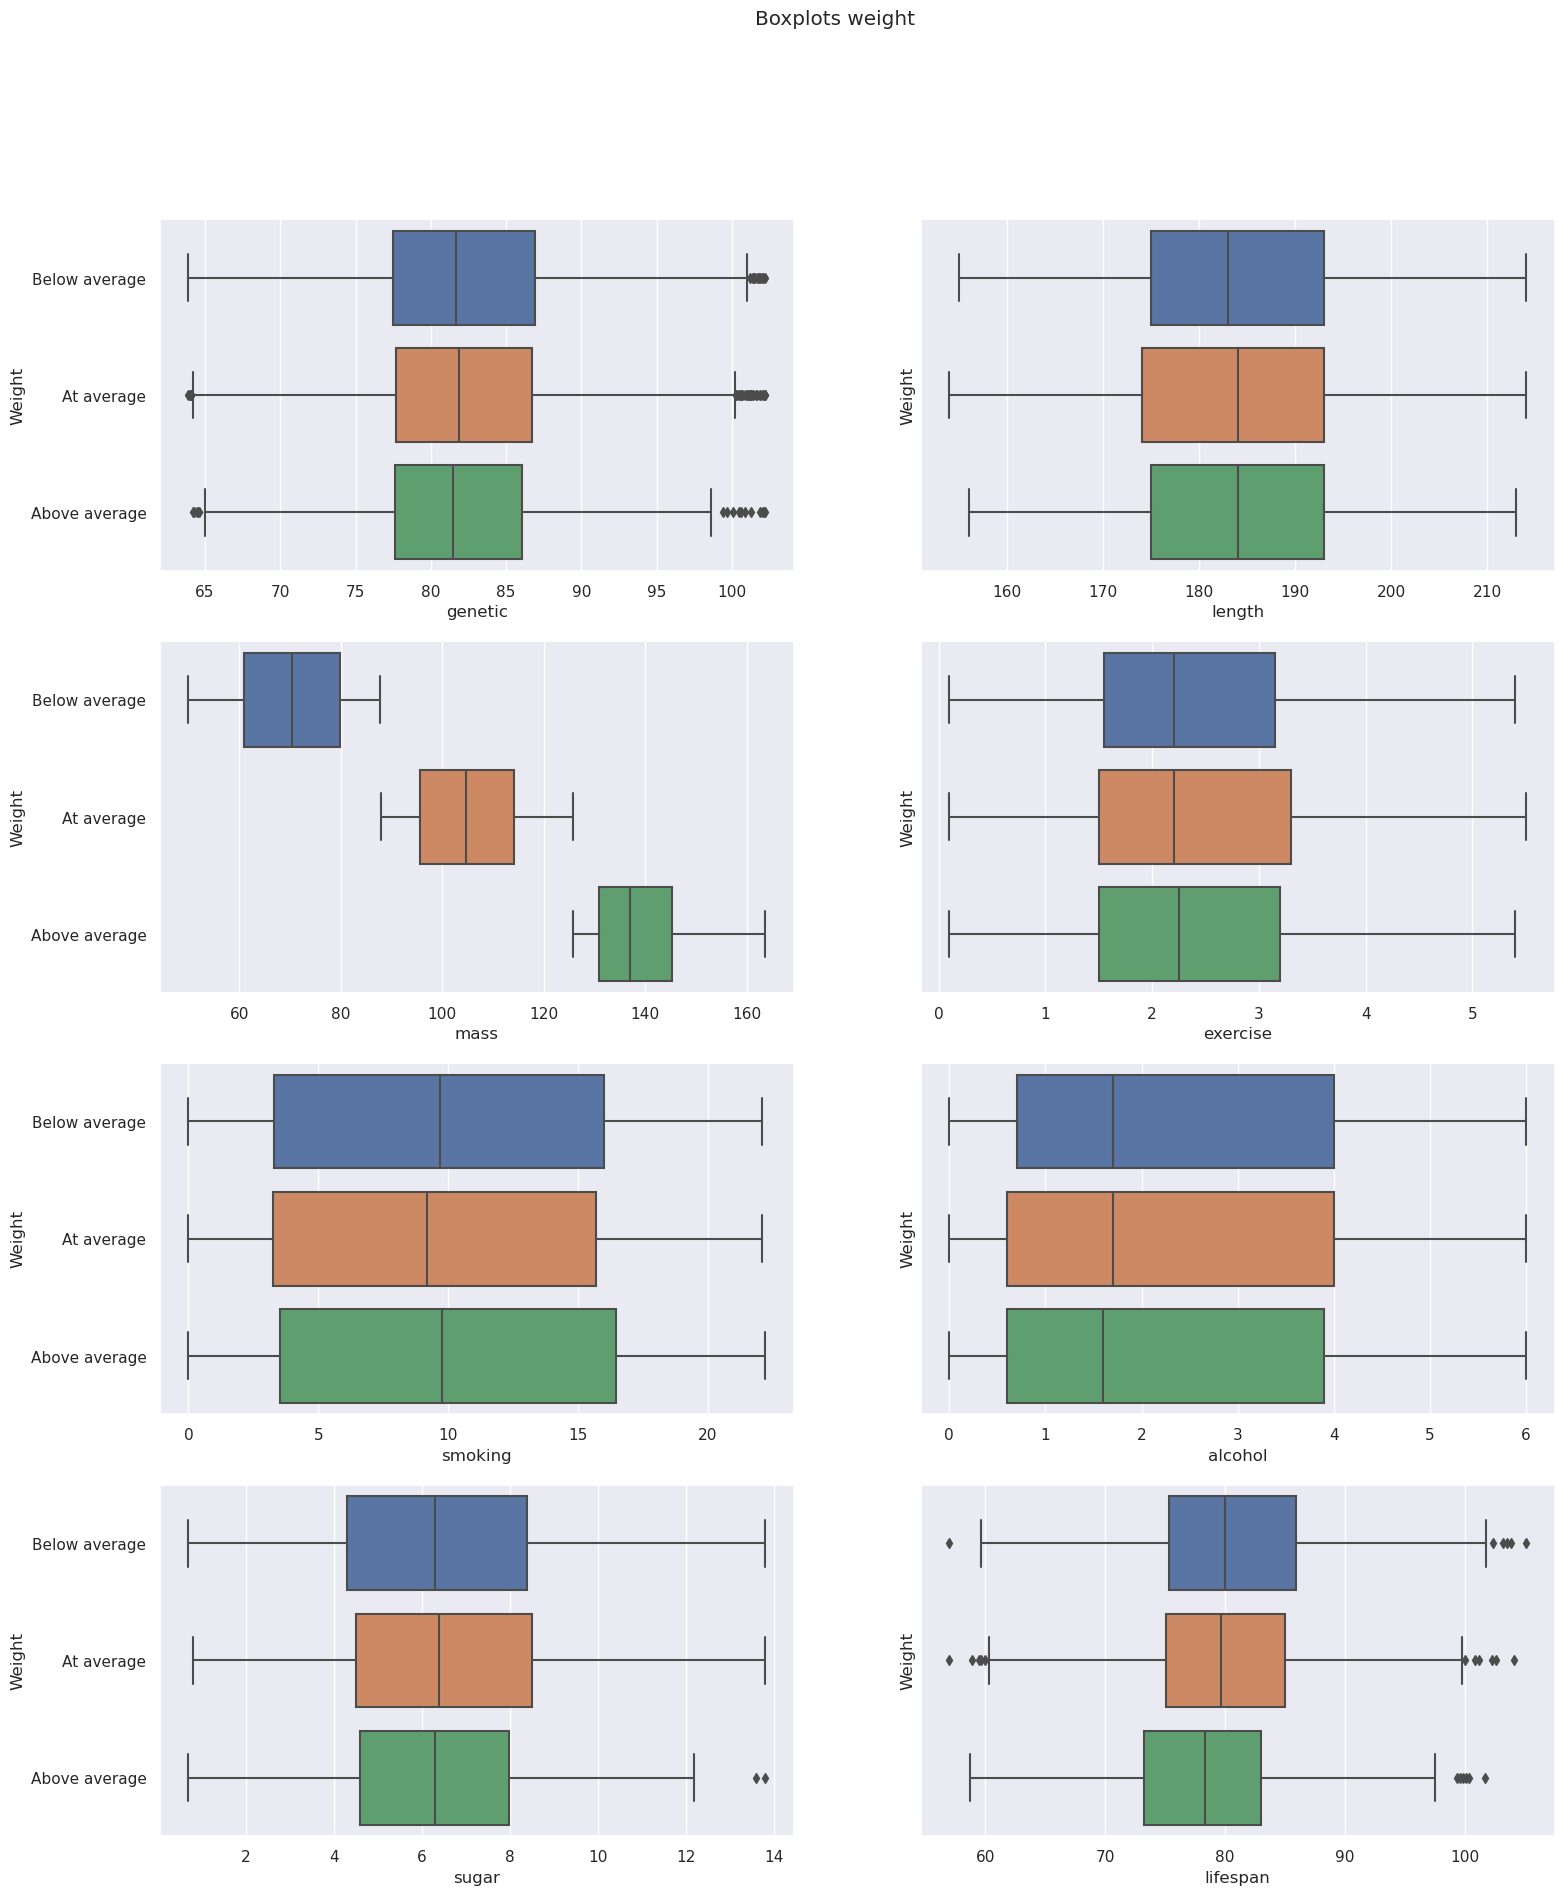

In [185]:
# Plot boxplots of parameters against Weight

fig, axes = plt.subplots(4, 2, figsize=(18, 21), sharey=True)
fig.suptitle('Boxplots weight')
sns.boxplot(ax=axes[0, 0], x=df['genetic'], y=df['Weight'])
sns.boxplot(ax=axes[0, 1], x=df['length'], y=df['Weight'])
sns.boxplot(ax=axes[1, 0], x=df['mass'], y=df['Weight'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'], y=df['Weight'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'], y=df['Weight'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'], y=df['Weight'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'], y=df['Weight'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'], y=df['Weight'])

In [186]:
# Adding BMI
df['bmi'] = round(df['mass'] / (df['length']/100)**2,1)
bmi_bins = [0, 18.5, 25, 30, np.inf]
df['bmi_bins'] = pd.cut(df['bmi'], bmi_bins, labels=["Underweight", "Normal", "Overweight", "Obese"])
# reorder columns to put lifespan at the end
df = df.reindex(columns=['genetic', 'length', 'mass', 'bmi', 'exercise', 'smoking', 'alcohol', 'sugar', 'is_smoking', 'Sugar cubes', 'Alcohol intake', 'Weight', 'bmi_bins', 'lifespan'])

<AxesSubplot: xlabel='lifespan', ylabel='bmi_bins'>

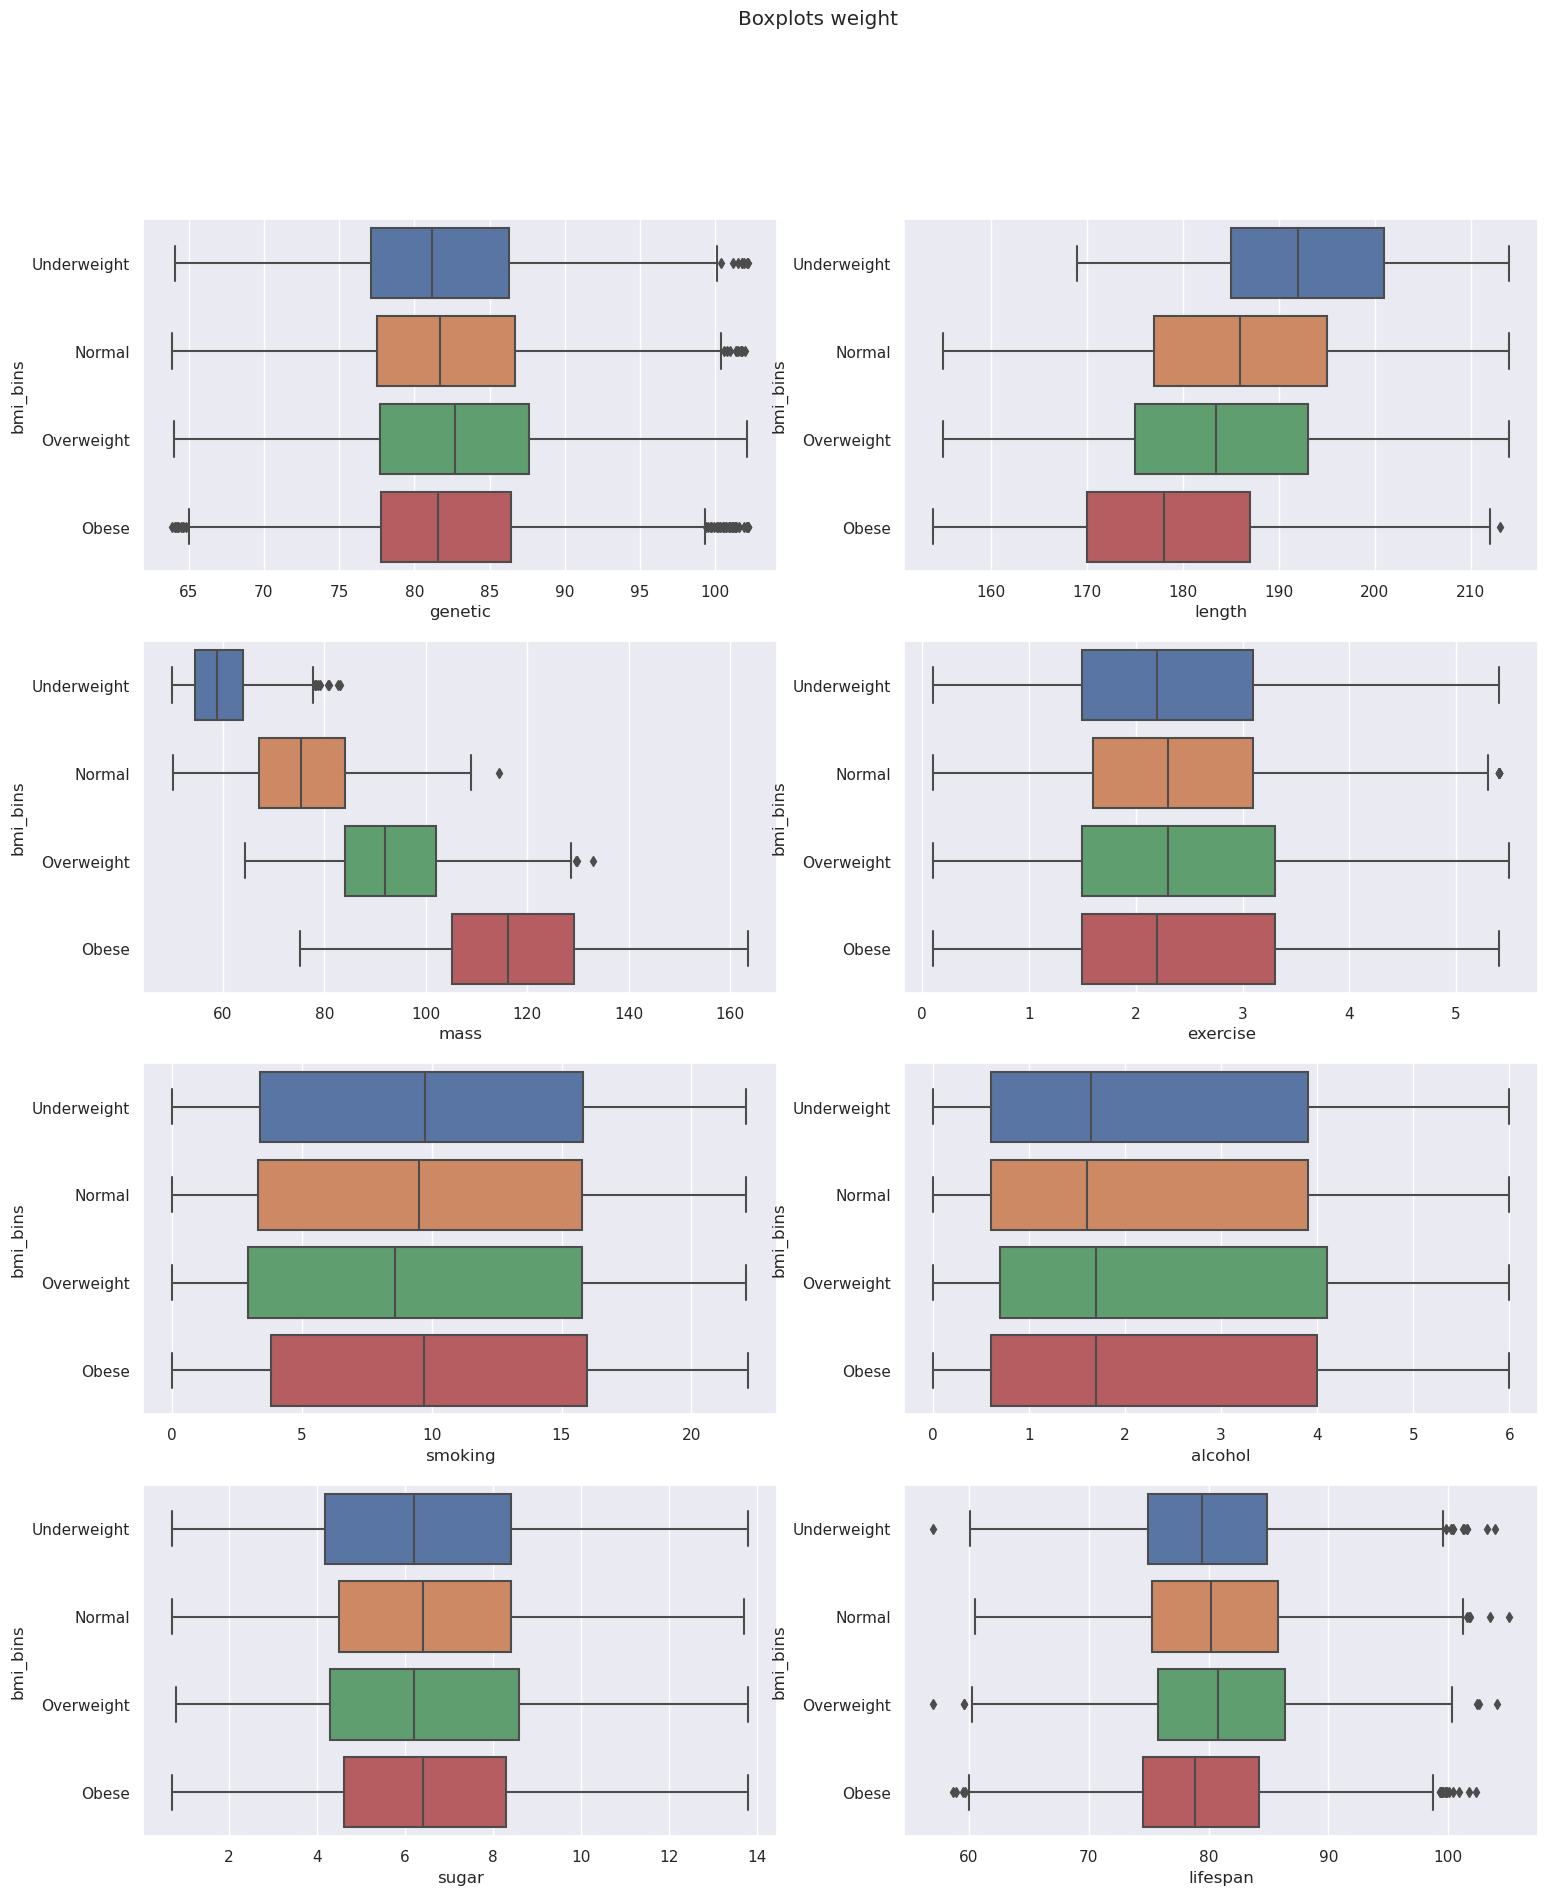

In [187]:
# Plot boxplots of parameters against bmi_bins

fig, axes = plt.subplots(4, 2, figsize=(18, 21))
fig.suptitle('Boxplots weight')
sns.boxplot(ax=axes[0, 0], x=df['genetic'], y=df['bmi_bins'])
sns.boxplot(ax=axes[0, 1], x=df['length'], y=df['bmi_bins'])
sns.boxplot(ax=axes[1, 0], x=df['mass'], y=df['bmi_bins'])
sns.boxplot(ax=axes[1, 1], x=df['exercise'], y=df['bmi_bins'])
sns.boxplot(ax=axes[2, 0], x=df['smoking'], y=df['bmi_bins'])
sns.boxplot(ax=axes[2, 1], x=df['alcohol'], y=df['bmi_bins'])
sns.boxplot(ax=axes[3, 0], x=df['sugar'], y=df['bmi_bins'])
sns.boxplot(ax=axes[3, 1], x=df['lifespan'], y=df['bmi_bins'])

## Boxplots of interest

### **Summary**

I found 5 trends in the data.

Smoking and alcohol shows a negative linear relationship with lifespan. For sugar this is less visible.

BMI seems to show a non-linear relationship with lifespan. This is something to take into account when building the model.

<AxesSubplot: xlabel='lifespan', ylabel='bmi_bins'>

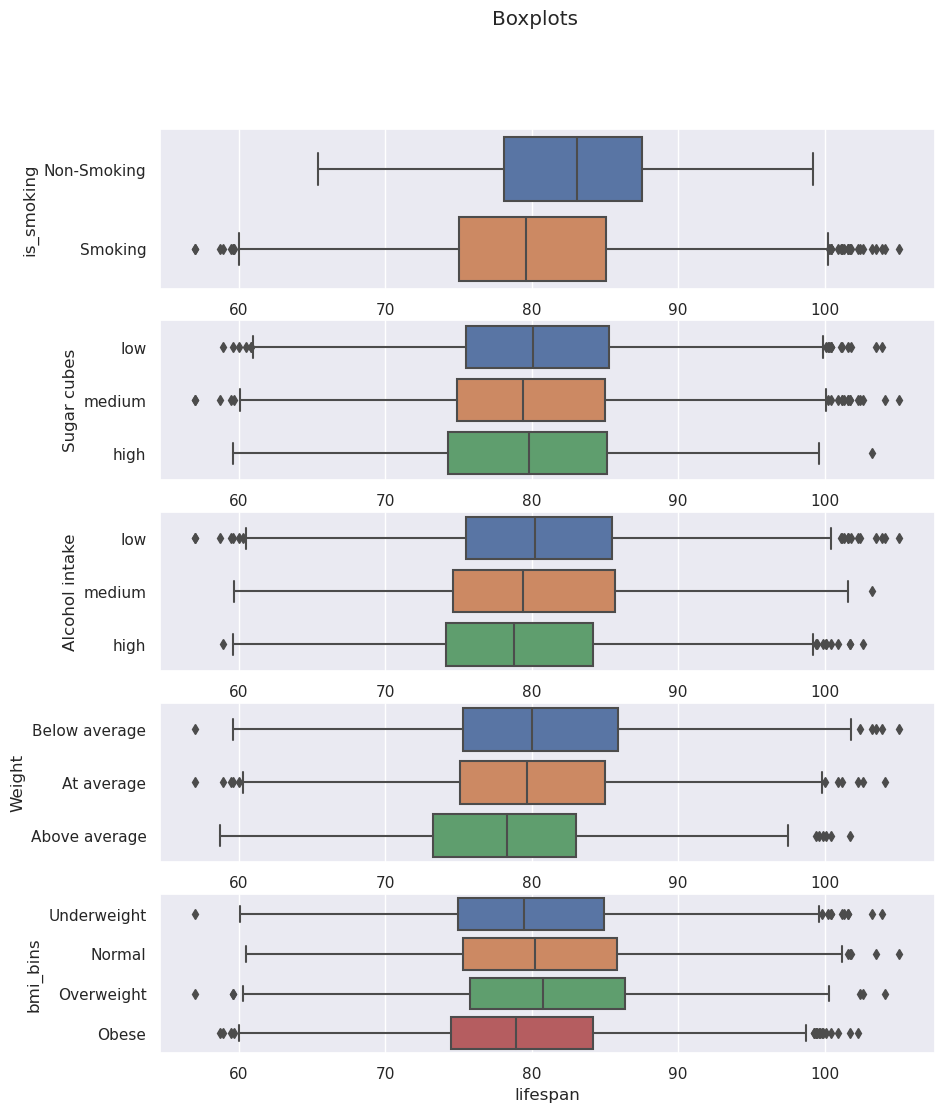

In [188]:
# Show the interesting plots
fig, axes = plt.subplots(5, 1, figsize=(10, 12))
fig.suptitle('Boxplots')
sns.boxplot(ax=axes[0], x=df['lifespan'], y=df['is_smoking'])
sns.boxplot(ax=axes[1], x=df['lifespan'], y=df['Sugar cubes'])
sns.boxplot(ax=axes[2], x=df['lifespan'], y=df['Alcohol intake'])
sns.boxplot(ax=axes[3], x=df['lifespan'], y=df['Weight'])
sns.boxplot(ax=axes[4], x=df['lifespan'], y=df['bmi_bins'])

## Correlation heatmap plot

### **Summary**

Genetic shows a clear linear relationship with lifespan.

Smoking and alcohol relationships with lifespan are again confirmed in the correlation plot. Same applies for BMI.

Relationships between dependant variables are not visible.

/tmp/ipykernel_825/930736049.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


genetic    length      mass       bmi  exercise   smoking  \
genetic   1.000000 -0.029606  0.000513  0.009971 -0.035005 -0.015490   
length   -0.029606  1.000000  0.000106 -0.439208  0.011401 -0.020691   
mass      0.000513  0.000106  1.000000  0.887950  0.008204 -0.009541   
bmi       0.009971 -0.439208  0.887950  1.000000  0.001986  0.005512   
exercise -0.035005  0.011401  0.008204  0.001986  1.000000  0.021512   
smoking  -0.015490 -0.020691 -0.009541  0.005512  0.021512  1.000000   
alcohol  -0.013170 -0.007162  0.000726  0.003332 -0.024521 -0.012298   
sugar     0.018785  0.007860  0.005601  0.001778 -0.008328  0.008925   
lifespan  0.949799  0.013155 -0.066040 -0.074190  0.082986 -0.246140   

           alcohol     sugar  lifespan  
genetic  -0.013170  0.018785  0.949799  
length   -0.007162  0.007860  0.013155  
mass      0.000726  0.005601 -0.066040  
bmi       0.003332  0.001778 -0.074190  
exercise -0.024521 -0.008328  0.082986  
smoking  -0.012298  0.008925 -0.246140  
alcohol   1.000000  0.003860 -0.063539  
sugar     0.003860  1.000000 -0.010887  
lifespan -0.063539 -0.010887  1.000000

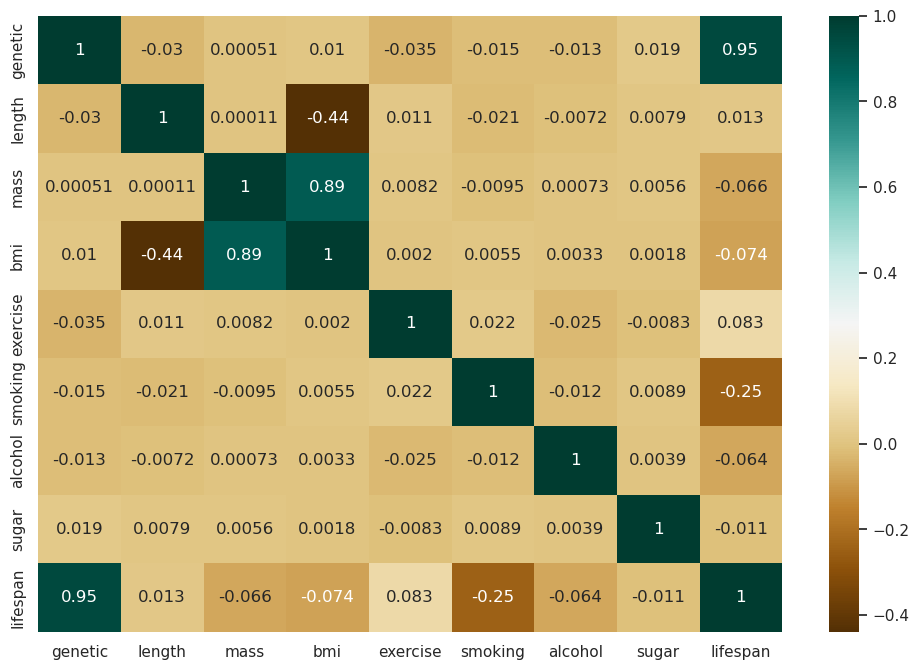

In [189]:
# Correlation heatmap plot
plt.figure(figsize=(12,8))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

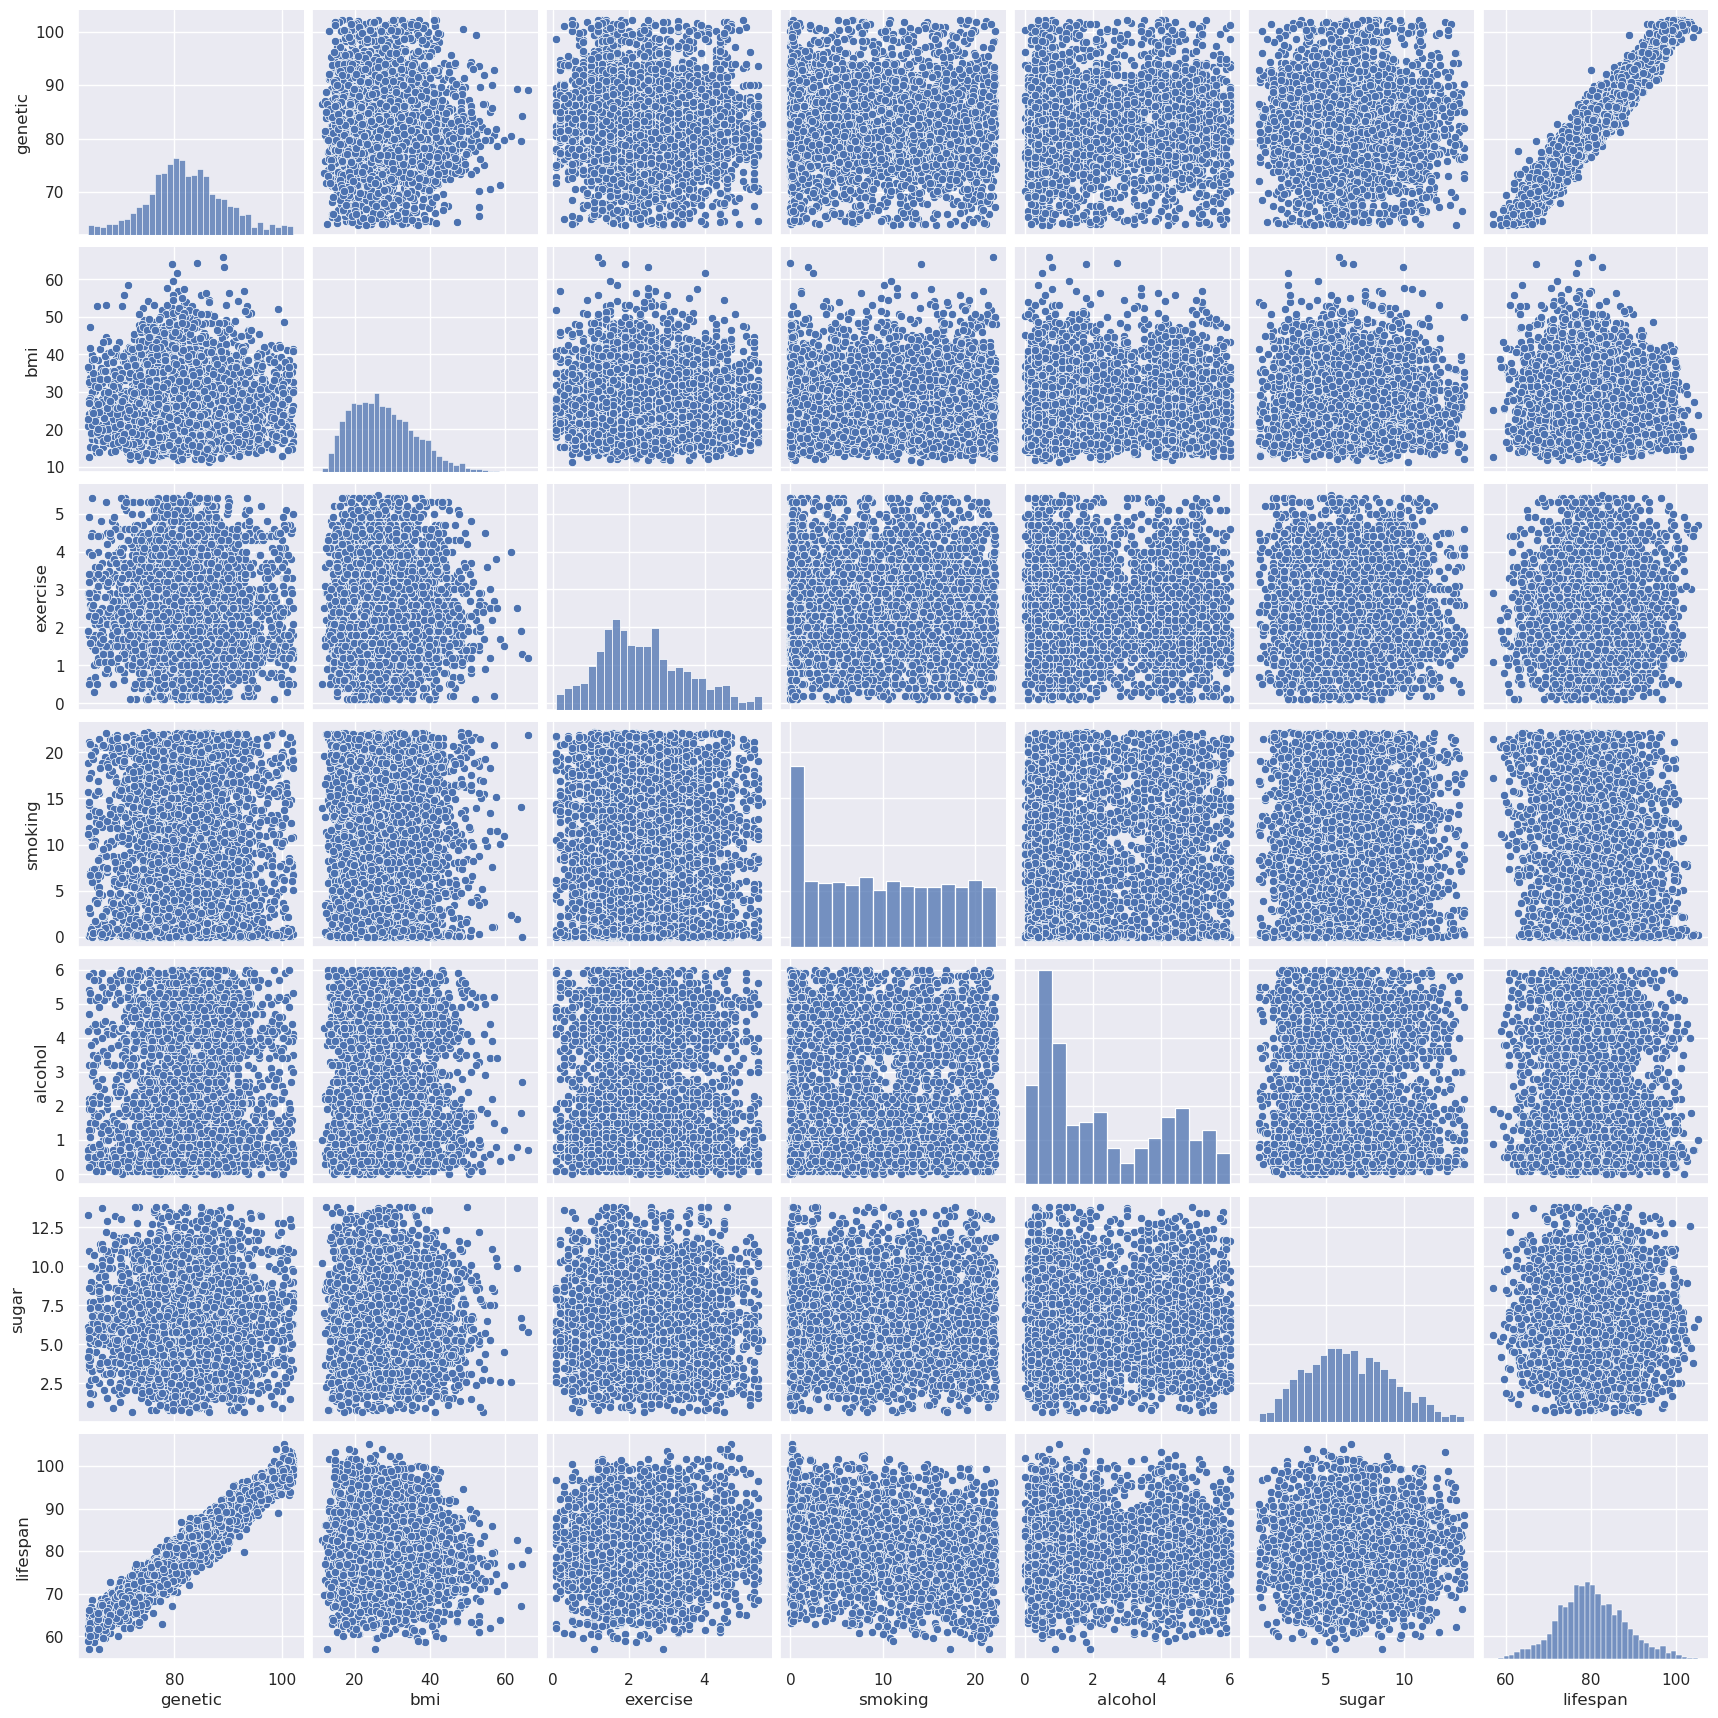

In [190]:
sns.pairplot(df.loc[:, ~df.columns.isin(['mass', 'length'])])
plt.show()

## Preparing datasets for training model

In [197]:
columns = ['genetic', 'exercise', 'smoking', 'alcohol', 'sugar', 'bmi', 'lifespan']
df_cleaned = df.loc[:, df.columns.isin(columns)]
display(df_cleaned.info())

Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print()
print(Q3)
print()
print(IQR)
df_iqr_cleaned = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) |(df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)].loc[:, df_cleaned.columns.isin(columns)]
display(df_iqr_cleaned.info())

# read to csv
df_cleaned.to_csv('../data/data_cleaned.csv', index=False)
df_iqr_cleaned.to_csv('../data/data_iqr_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4095
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4084 non-null   float64
 1   bmi       4084 non-null   float64
 2   exercise  4084 non-null   float64
 3   smoking   4084 non-null   float64
 4   alcohol   4084 non-null   float64
 5   sugar     4084 non-null   float64
 6   lifespan  4084 non-null   float64
dtypes: float64(7)
memory usage: 255.2 KB


None

genetic     77.600
bmi         20.900
exercise     1.500
smoking      3.375
alcohol      0.600
sugar        4.400
lifespan    75.000
Name: 0.25, dtype: float64

genetic     86.7
bmi         33.2
exercise     3.2
smoking     15.9
alcohol      4.0
sugar        8.4
lifespan    85.2
Name: 0.75, dtype: float64

genetic      9.100
bmi         12.300
exercise     1.700
smoking     12.525
alcohol      3.400
sugar        4.000
lifespan    10.200
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3977 entries, 0 to 4094
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   3977 non-null   float64
 1   bmi       3977 non-null   float64
 2   exercise  3977 non-null   float64
 3   smoking   3977 non-null   float64
 4   alcohol   3977 non-null   float64
 5   sugar     3977 non-null   float64
 6   lifespan  3977 non-null   float64
dtypes: float64(7)
memory usage: 248.6 KB


None